In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.rcParams['figure.figsize'] = (10,7)
plt.rc('font',size = 15)
plt.rc('axes',axisbelow = True)

In [4]:
data = pd.read_csv('/Users/vadimsmirnov/Desktop/Project_ML/bank-additional-full.csv', sep = ';')

In [6]:
data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [10]:
print('Data.shape: ', data.shape)
print('The number of features : {0}'.format(data.shape[1]-1))

Data.shape:  (41188, 21)
The number of features : 20


In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

In [165]:
cat = data.select_dtypes('object').columns
num = data.select_dtypes('number').columns

In [166]:
cat

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'target'],
      dtype='object')

In [159]:
type(data['job'])

pandas.core.series.Series

In [12]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [13]:
data[data.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [14]:
data = data.drop_duplicates().reset_index(drop=True)

In [16]:
data = data.rename(columns = {'y':'target'})

In [18]:
data['target'].value_counts()

target
no     36537
yes     4639
Name: count, dtype: int64

In [19]:
data['target'].value_counts(normalize = True)

target
no     0.887337
yes    0.112663
Name: proportion, dtype: float64

<BarContainer object of 2 artists>

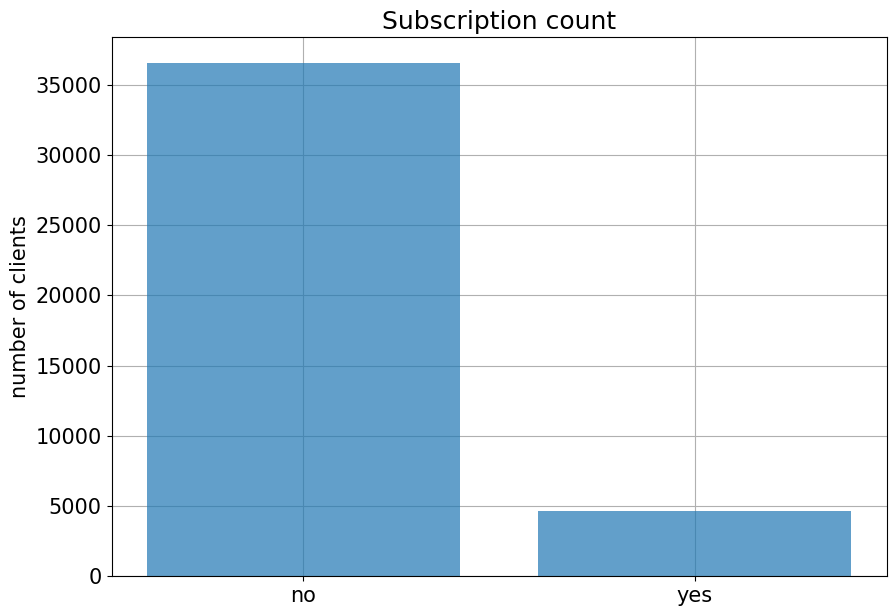

In [25]:
x  = data['target'].value_counts().index.astype('str')
y  = data['target'].value_counts().values
plt.ylabel('number of clients')
plt.title('Subscription count')
plt.grid()
plt.bar(x,y,alpha = 0.7)

In [26]:
data.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [27]:
data['age'].describe()

count    41176.00000
mean        40.02380
std         10.42068
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

Text(0.5, 1.0, 'Distribution of age for Clients')

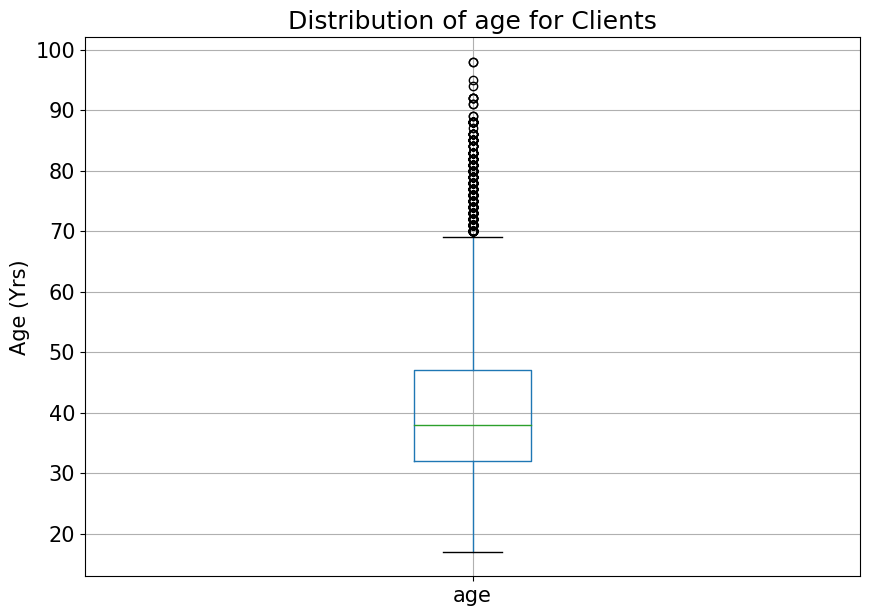

In [29]:
data.boxplot('age')
plt.ylabel('Age (Yrs)')
plt.title('Distribution of age for Clients')

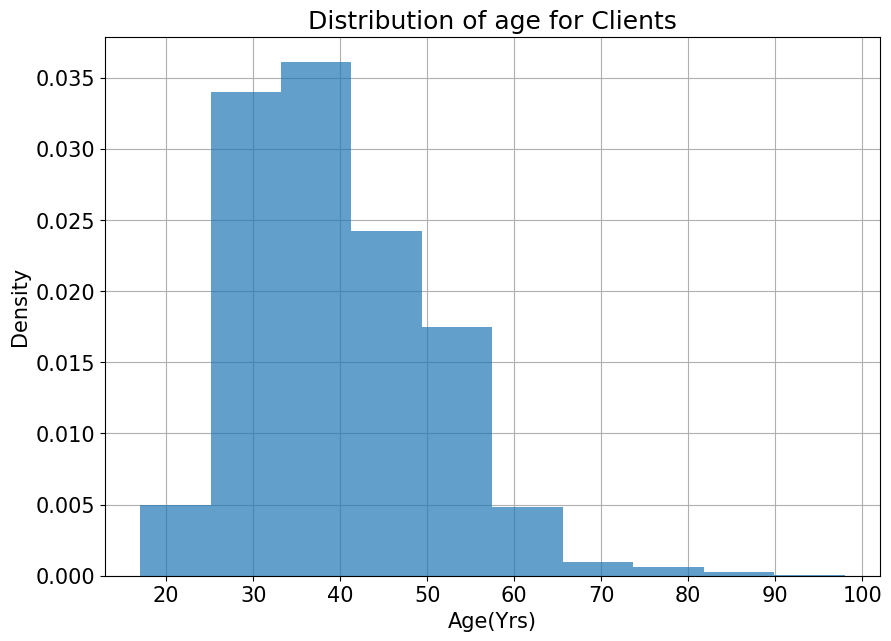

In [30]:
plt.hist(data['age'],density = True, alpha = 0.7)
plt.ylabel('Density')
plt.xlabel('Age(Yrs)')
plt.title('Distribution of age for Clients')
plt.grid()
plt.show()

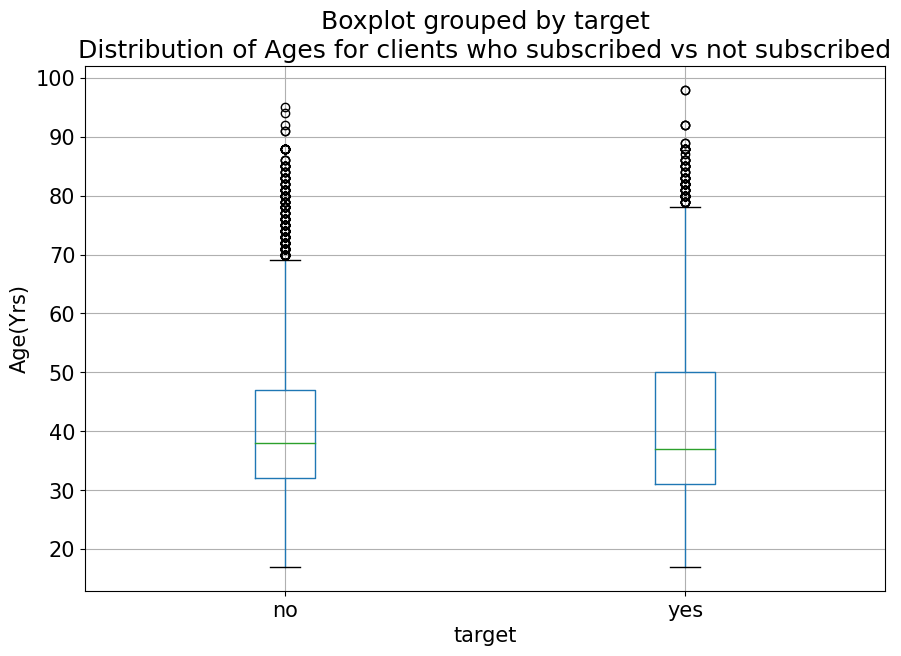

In [32]:
data.boxplot(column = ['age'],by= 'target')
plt.title('Distribution of Ages for clients who subscribed vs not subscribed')
plt.ylabel('Age(Yrs)')
plt.show()

In [33]:
data.groupby('target').age.describe()

,count,mean,std,min,25%,50%,75%,max
target,,,,,,,,
no,36537.0,39.910994,9.897176,17.0,32.0,38.0,47.0,95.0
yes,4639.0,40.912266,13.838838,17.0,31.0,37.0,50.0,98.0


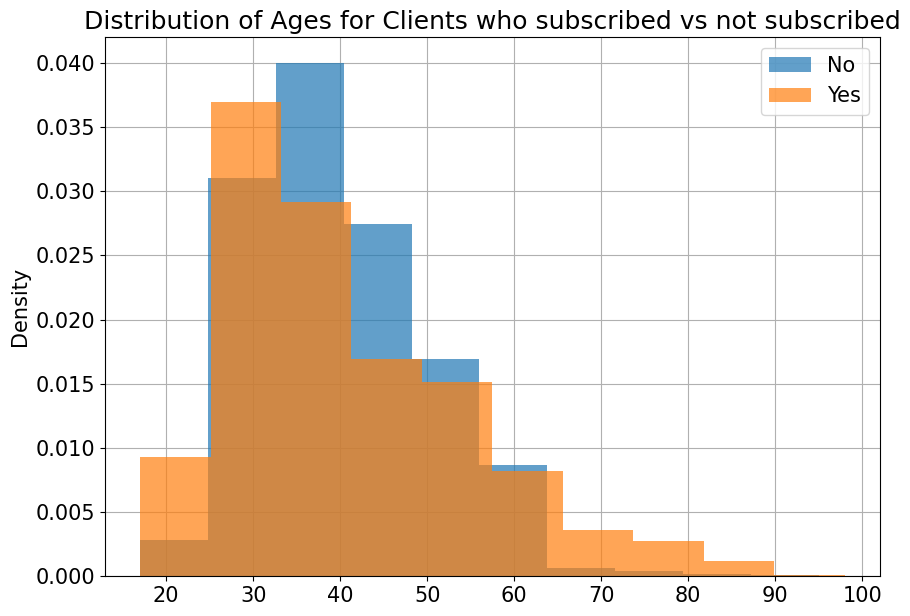

In [34]:
plt.hist(data[data.target == 'no'].age, density = True, alpha = 0.7, label='No')
plt.hist(data[data.target == 'yes'].age, density = True, alpha = 0.7, label = 'Yes')
plt.ylabel('Density')
plt.title('Distribution of Ages for Clients who subscribed vs not subscribed')
plt.grid()
plt.legend()
plt.show()

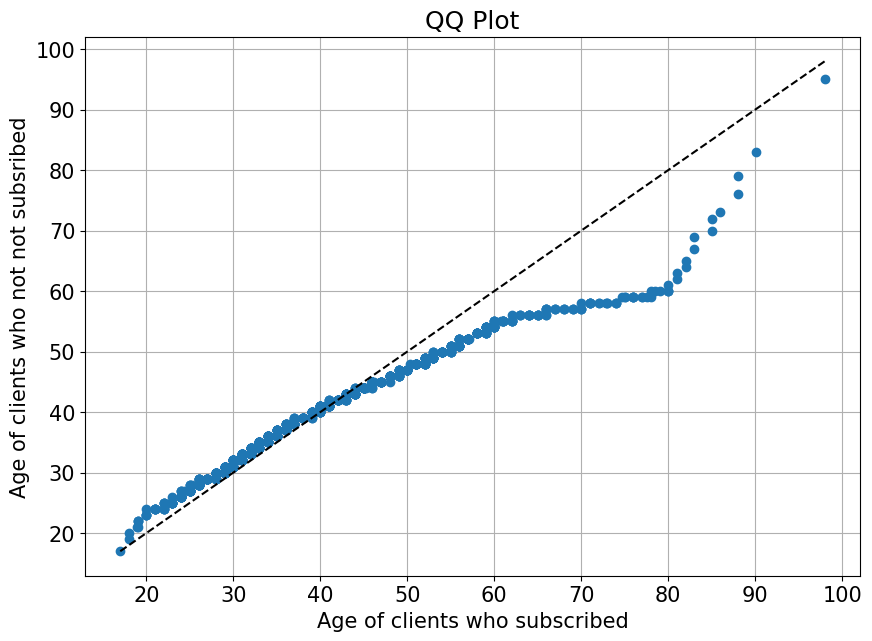

In [44]:
min_val = data['age'].min()
max_val = data['age'].max()
plt.scatter(np.quantile(data[data.target == 'yes'].age,np.linspace(0,1,1000)),np.quantile(data[data.target == 'no'].age,np.linspace(0,1,1000)))
plt.plot([min_val,max_val],[min_val,max_val],linestyle='--',color = 'k')
plt.xlabel('Age of clients who subscribed')
plt.ylabel('Age of clients who not not subsribed')
plt.title('QQ Plot')
plt.grid()

In [46]:
data.job.unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [92]:
def category_proportion_conversion_plot(feature):
    """
  Generates two plots 
  
  1. Count of each category within the feature under consideration, 
  for example when the feature under consideration is job this function 
  generates a bar plot of how many categories of job were there in the dataset. 
  
  2. Plot of the conversion rate of each category for the feature under consideration.
  Returns a dataframe.
  
  Parameters
  ----------
  feature: Takes a categorical feature input

  Returns
  -------
  Outputs two plots.
  """
    fig = plt.figure(figsize = (30,7))
    plt.rc('font',size = 15)
    plt.rc('axes', axisbelow = True)

    sub1 = plt.subplot(1,2,1)
    group = data[feature].value_counts(normalize = False)
    x = group.keys()
    y = group.values
    plt.bar(x,y,alpha=0.8)
    plt.title('Number of clients within each ' + feature + 'category')
    plt.xticks(rotation=90)

    for index, value in enumerate(y):
        plt.text(index-0.15,value+150,str(value),rotation = 0, fontsize = 11)
    plt.grid()
    plt.tight_layout()

  #Plot of conversion rate

    sub1 = plt.subplot(1,2,2)
    subscription_proportions = data.groupby(feature).target.value_counts(normalize = True).reset_index(name = 'percent')
    conversion_rate = subscription_proportions[subscription_proportions.target == 'yes'].reset_index(drop = True)
    conversion_rate.set_index(feature).reindex(index = group.keys()).reset_index().rename(columns = {'index':feature})
    x = conversion_rate[feature]
    y = conversion_rate.percent
    plt.bar(x,y,alpha = 0.8)
    plt.title('Conversion rate in this campaign wrt ' + feature + ' category')
    plt.xticks(rotation = 90)
    for index, value in enumerate(y):
        value_truncated = round(round(value,5)*100,2)
        plt.text(index-0.15,value+0.005,str(value_truncated)+str('%'), rotation = 0, fontsize = 11)
    plt.grid()
    plt.tight_layout()

    plt.show()


    

In [93]:
def group_comparison(feature,title_input):

    df = data.groupby('target')[feature].value_counts(normalize = True).reset_index(name = 'percent')

    fig = plt.figure(figsize = (15,5))
    plt.rc('font',size = 15)
    plt.rc('axes',axisbelow = True)
    sub1 = plt.subplot(1,1,1)
    sns.barplot(data = df, x =feature, hue = 'target', y = 'percent', alpha = 0.7)
    plt.ylabel('proportion')
    plt.title(title_input)
    plt.xticks(rotation=90)
    plt.grid()

    plt.show()

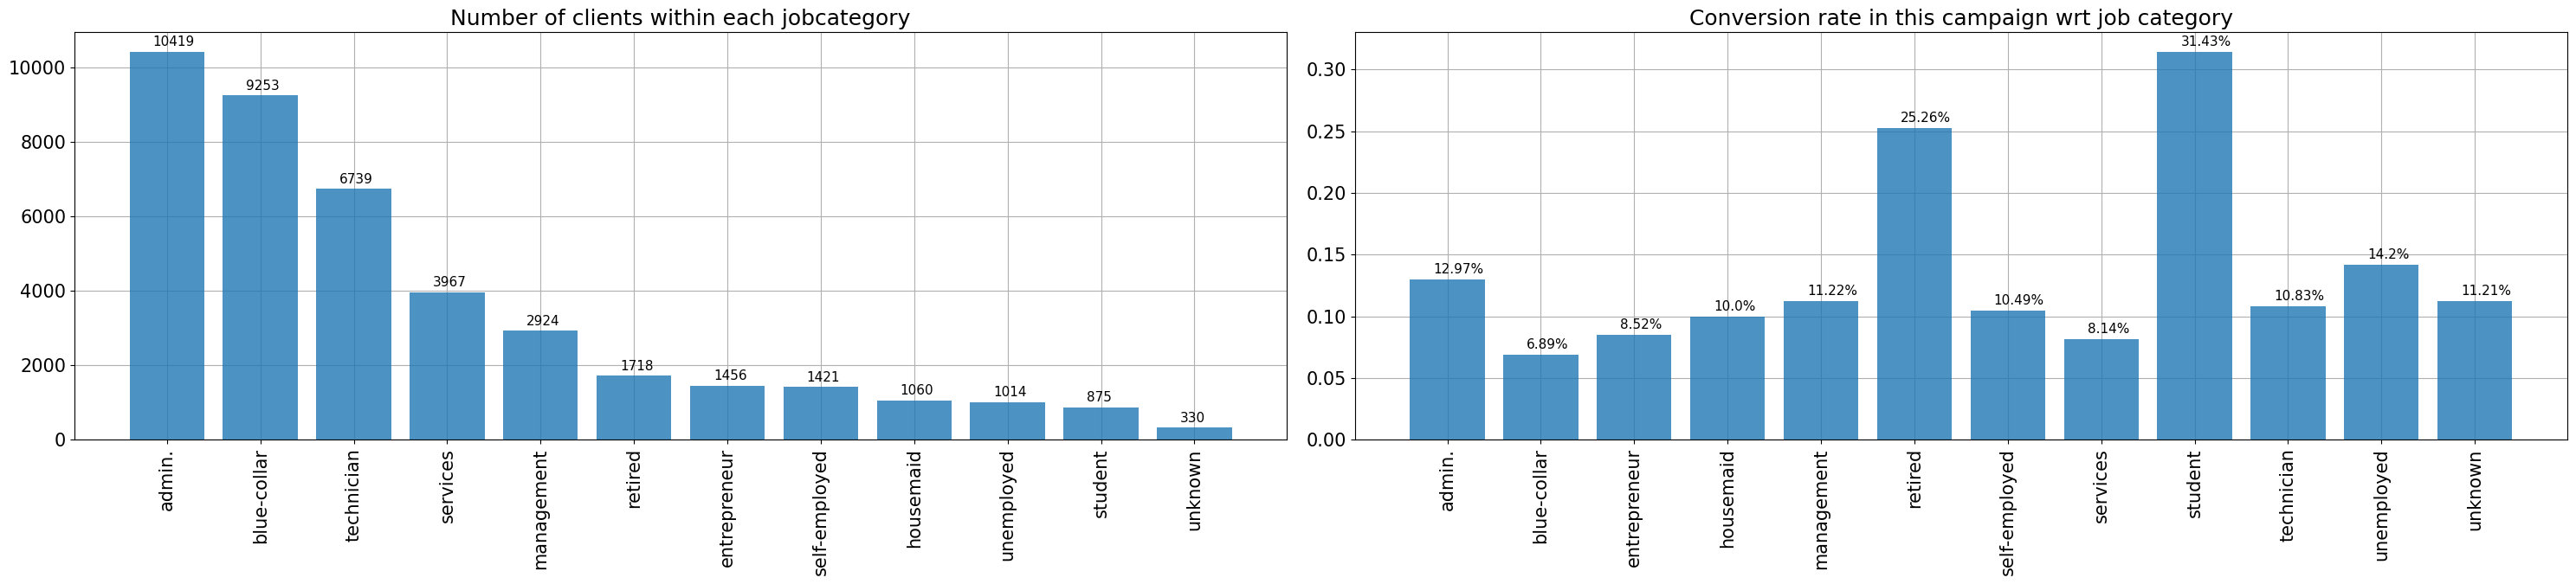

In [94]:
category_proportion_conversion_plot('job')

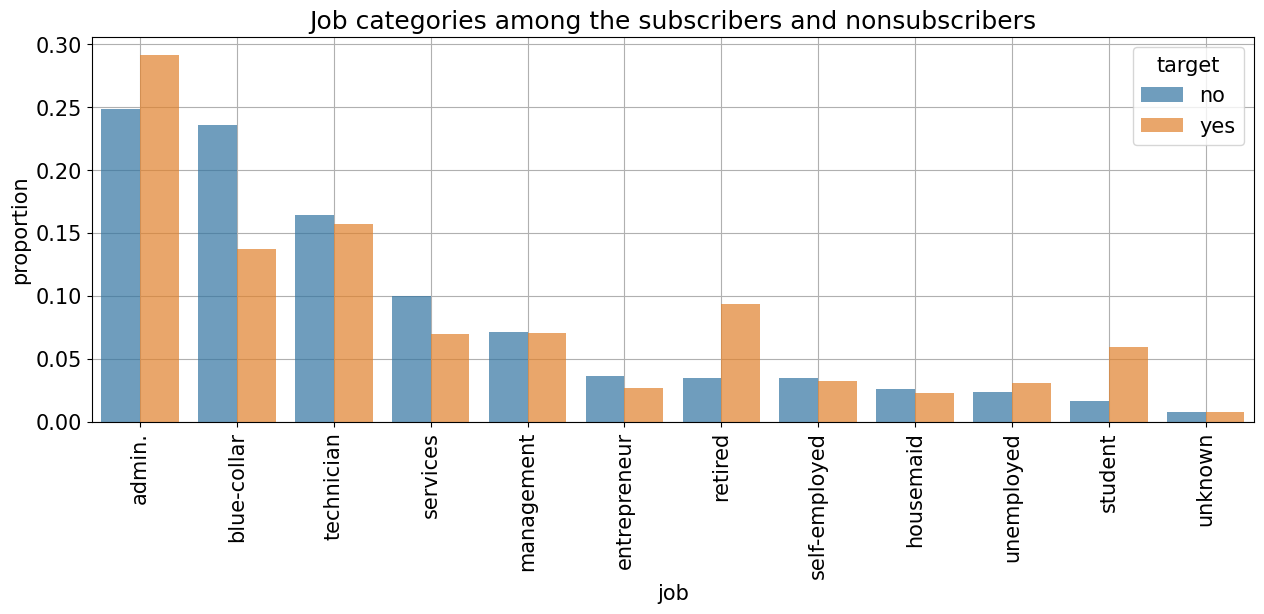

In [95]:
group_comparison('job','Job categories among the subscribers and nonsubscribers')

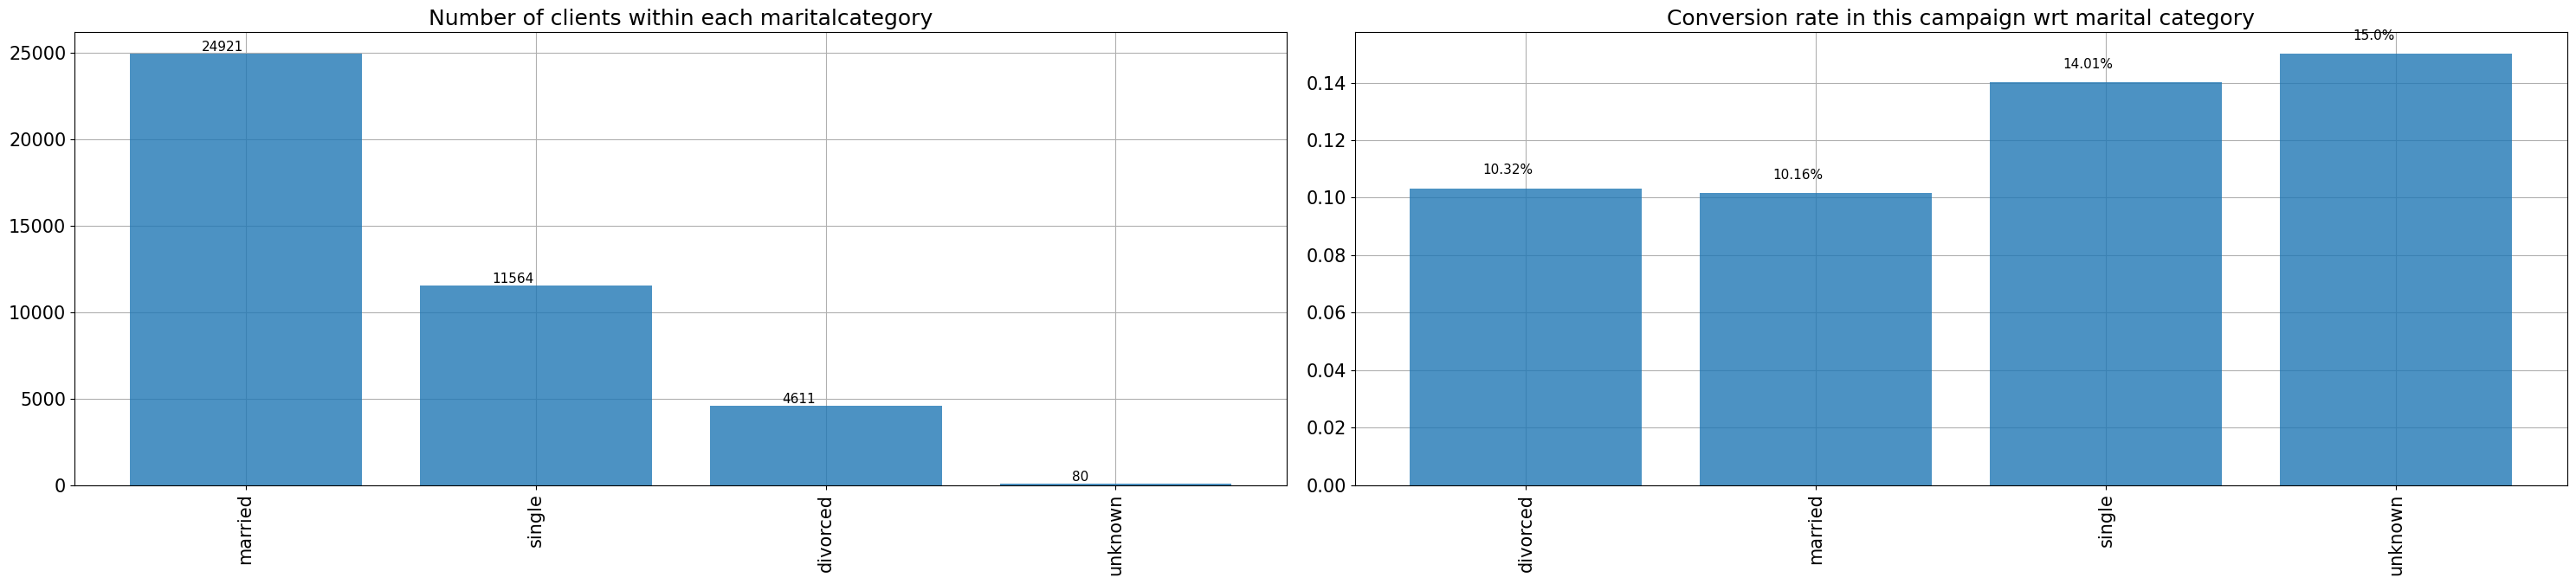

In [96]:
category_proportion_conversion_plot('marital')

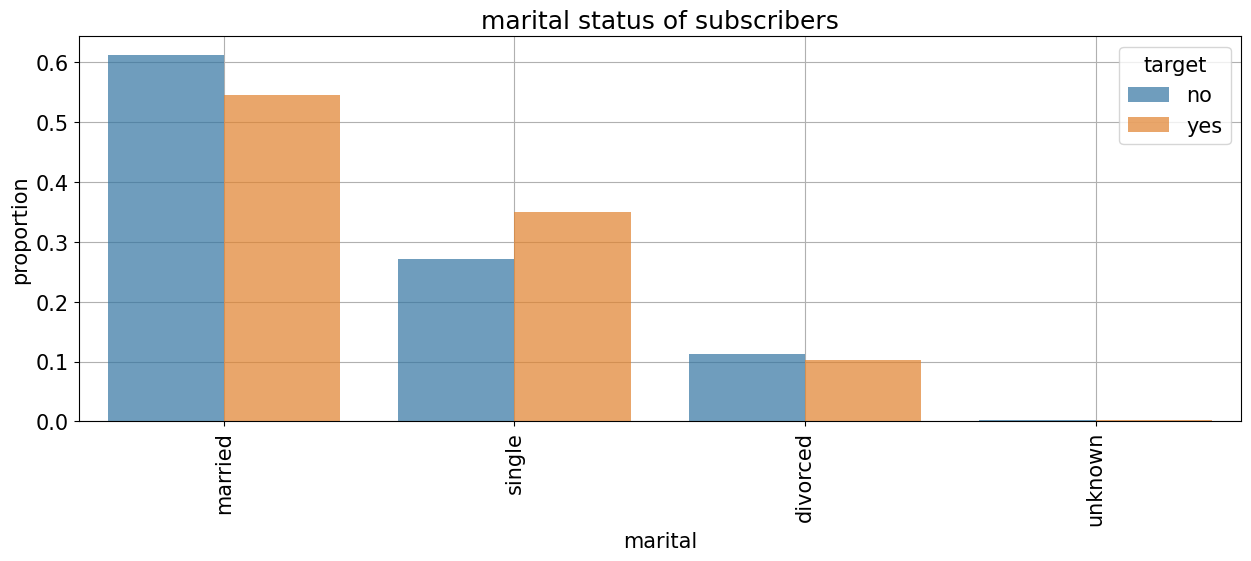

In [97]:
group_comparison('marital','marital status of subscribers')

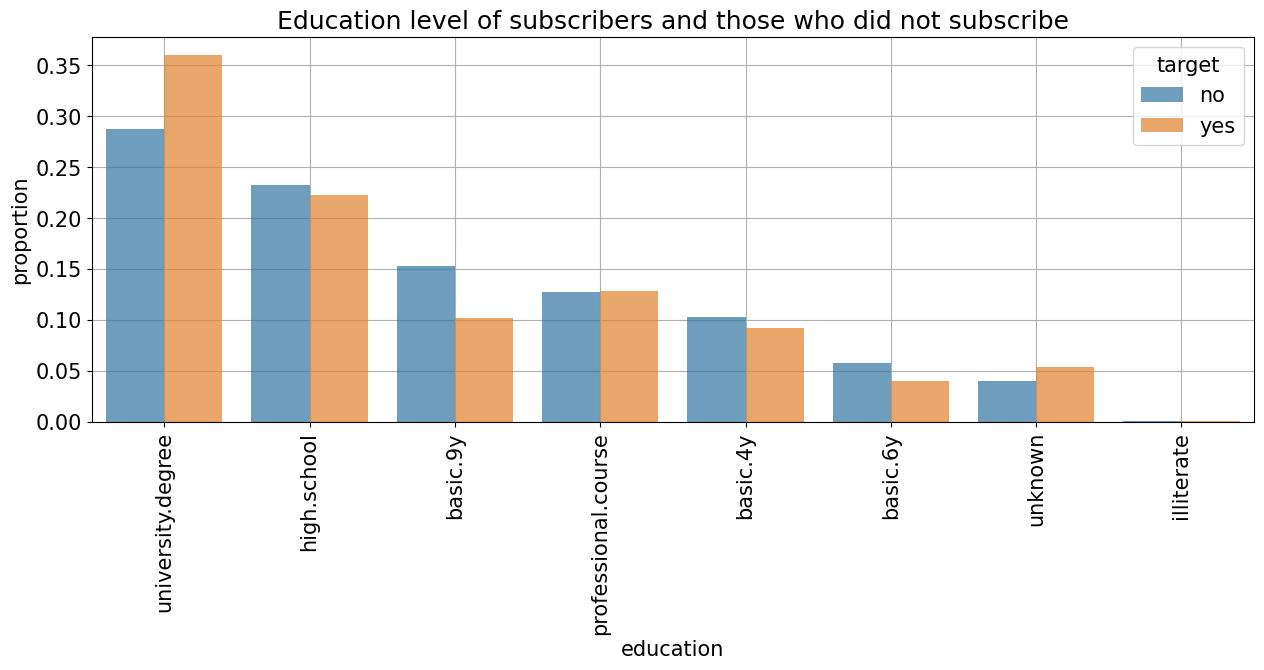

In [98]:
group_comparison('education','Education level of subscribers and those who did not subscribe')

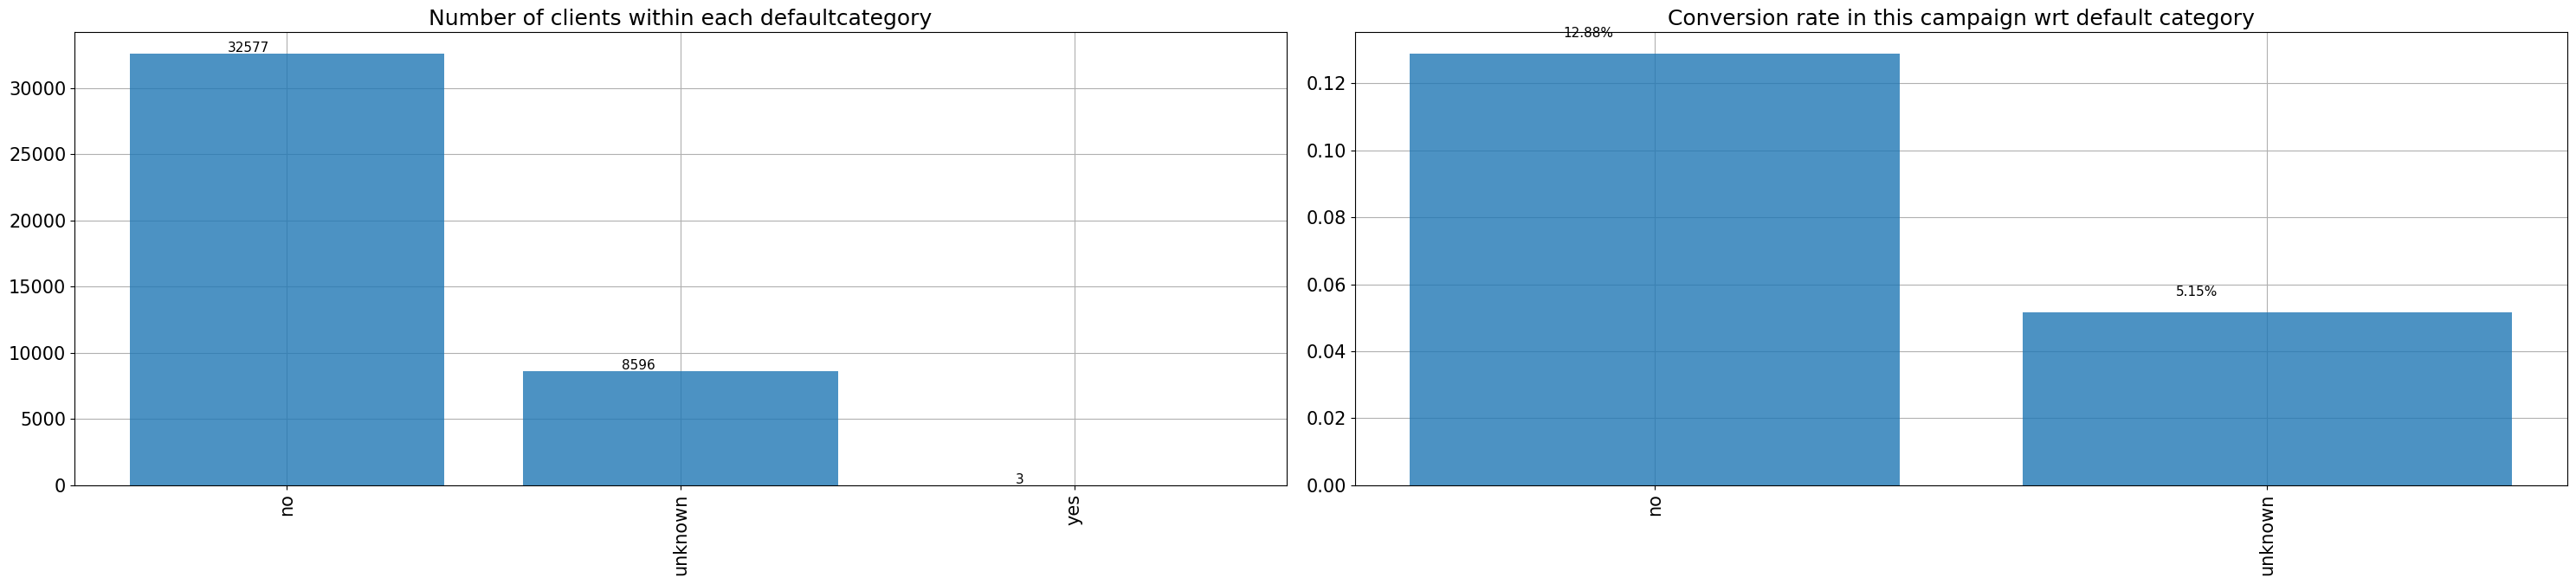

In [99]:
category_proportion_conversion_plot('default')

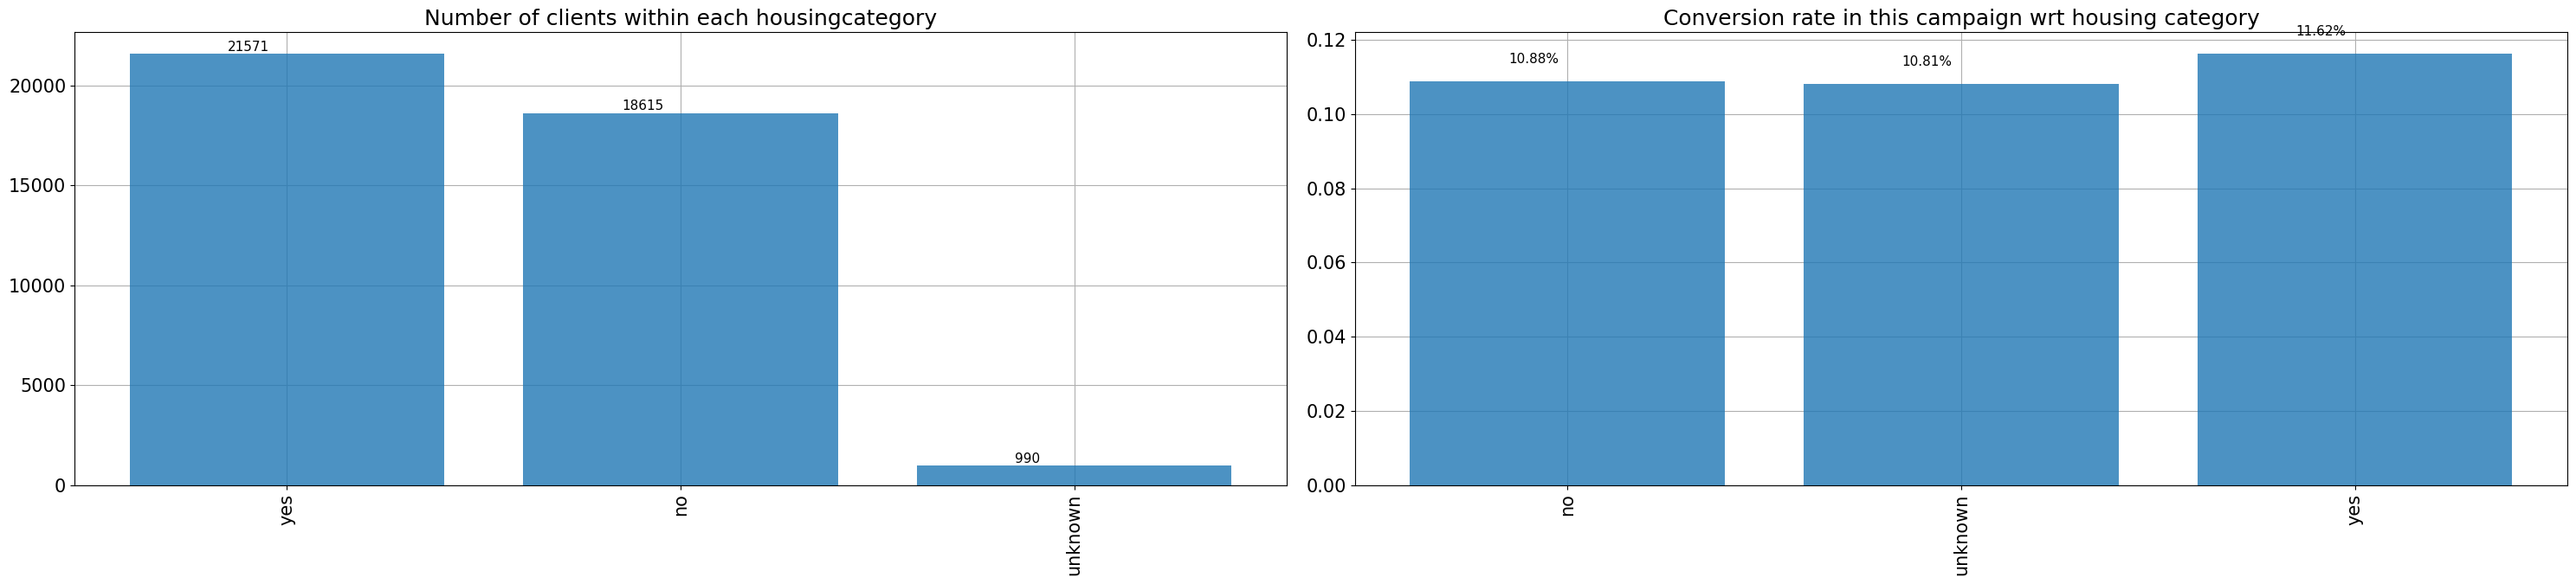

In [100]:
category_proportion_conversion_plot('housing')

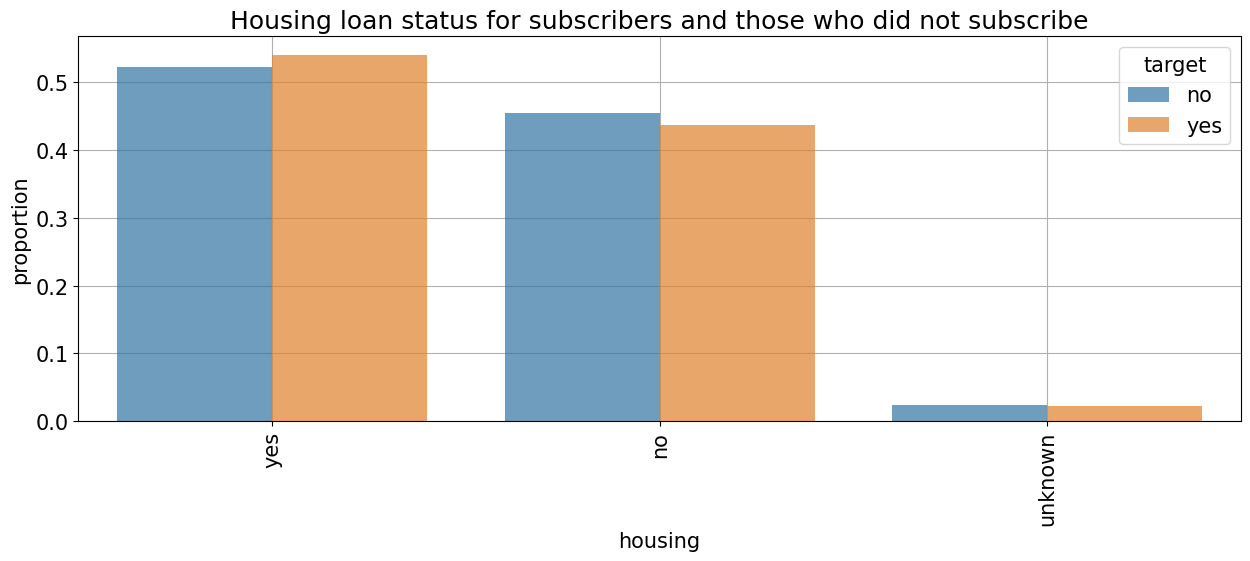

In [101]:
group_comparison('housing','Housing loan status for subscribers and those who did not subscribe')

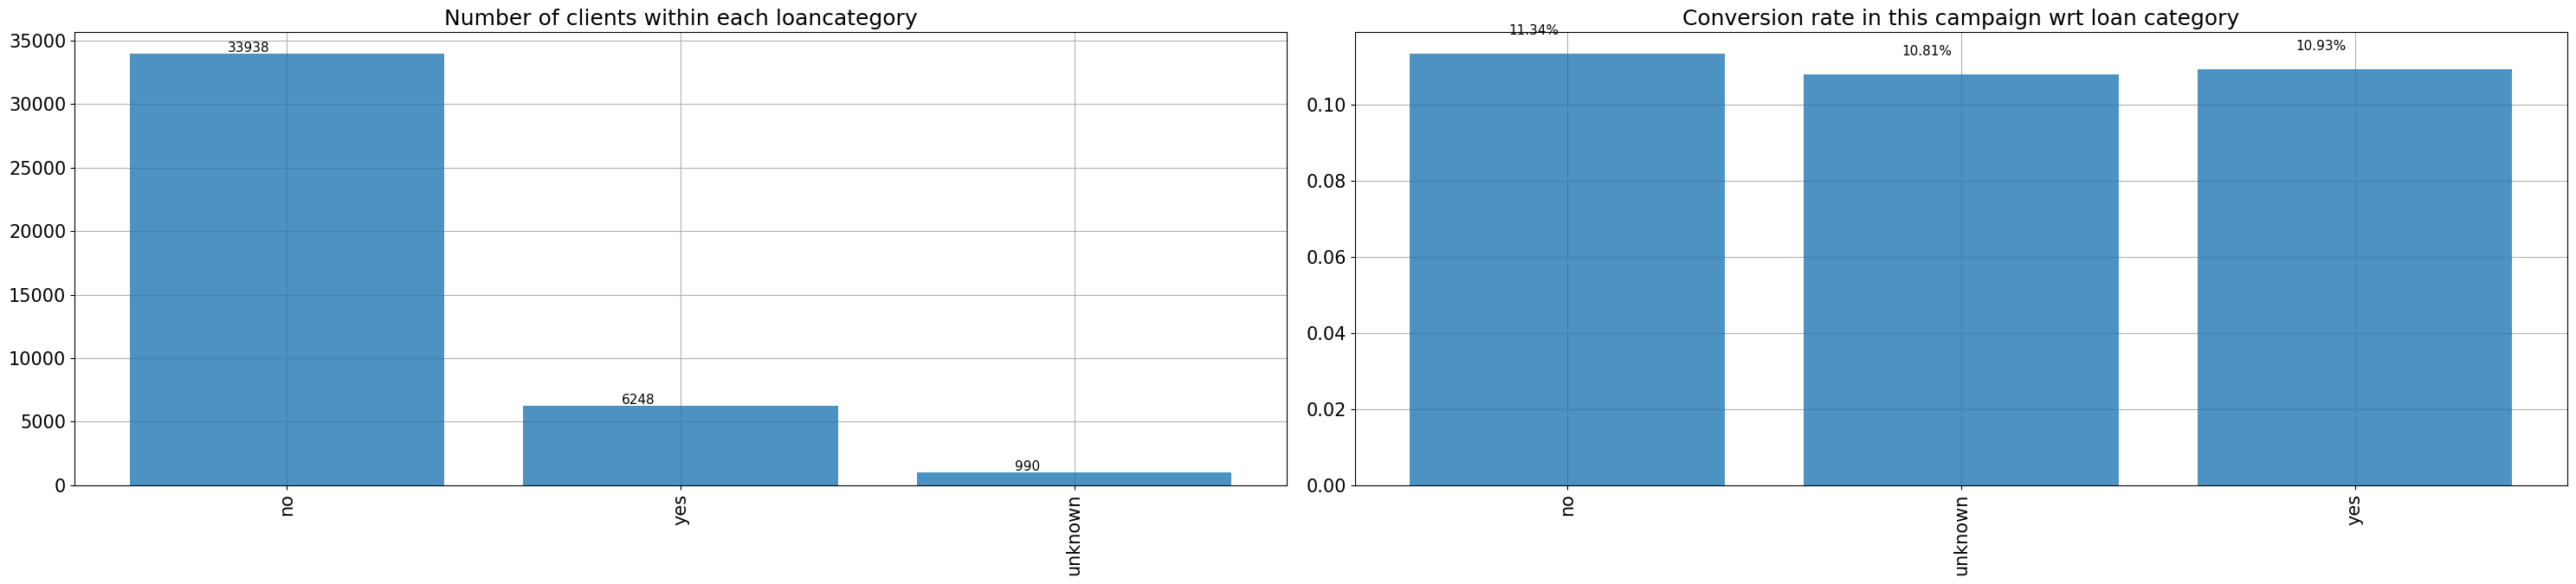

In [102]:
category_proportion_conversion_plot('loan')

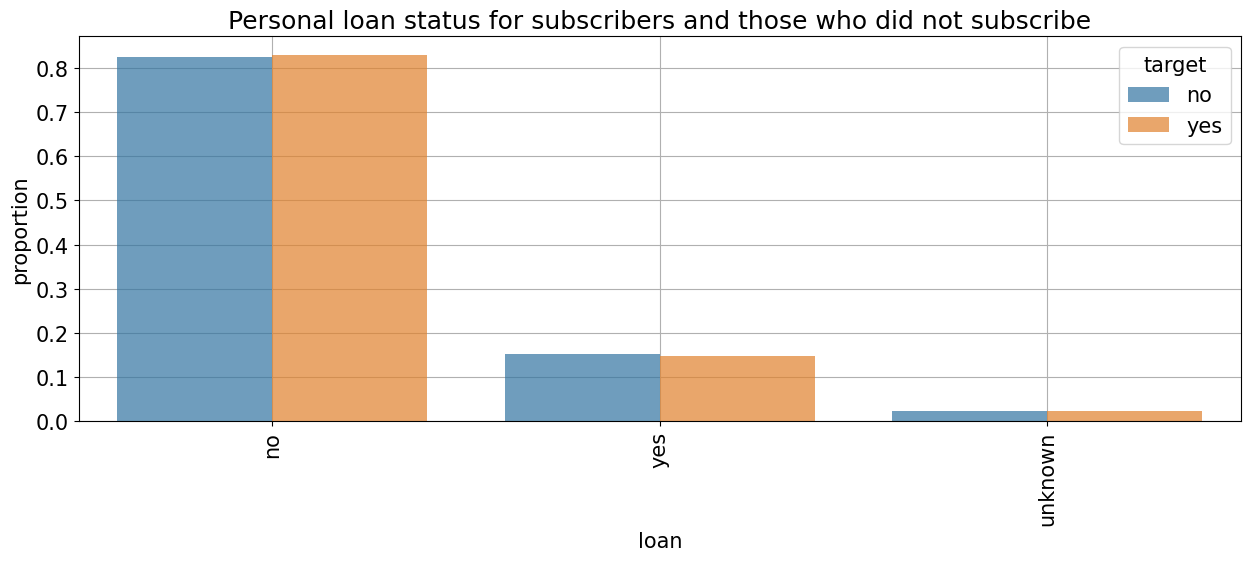

In [103]:
group_comparison('loan','Personal loan status for subscribers and those who did not subscribe')

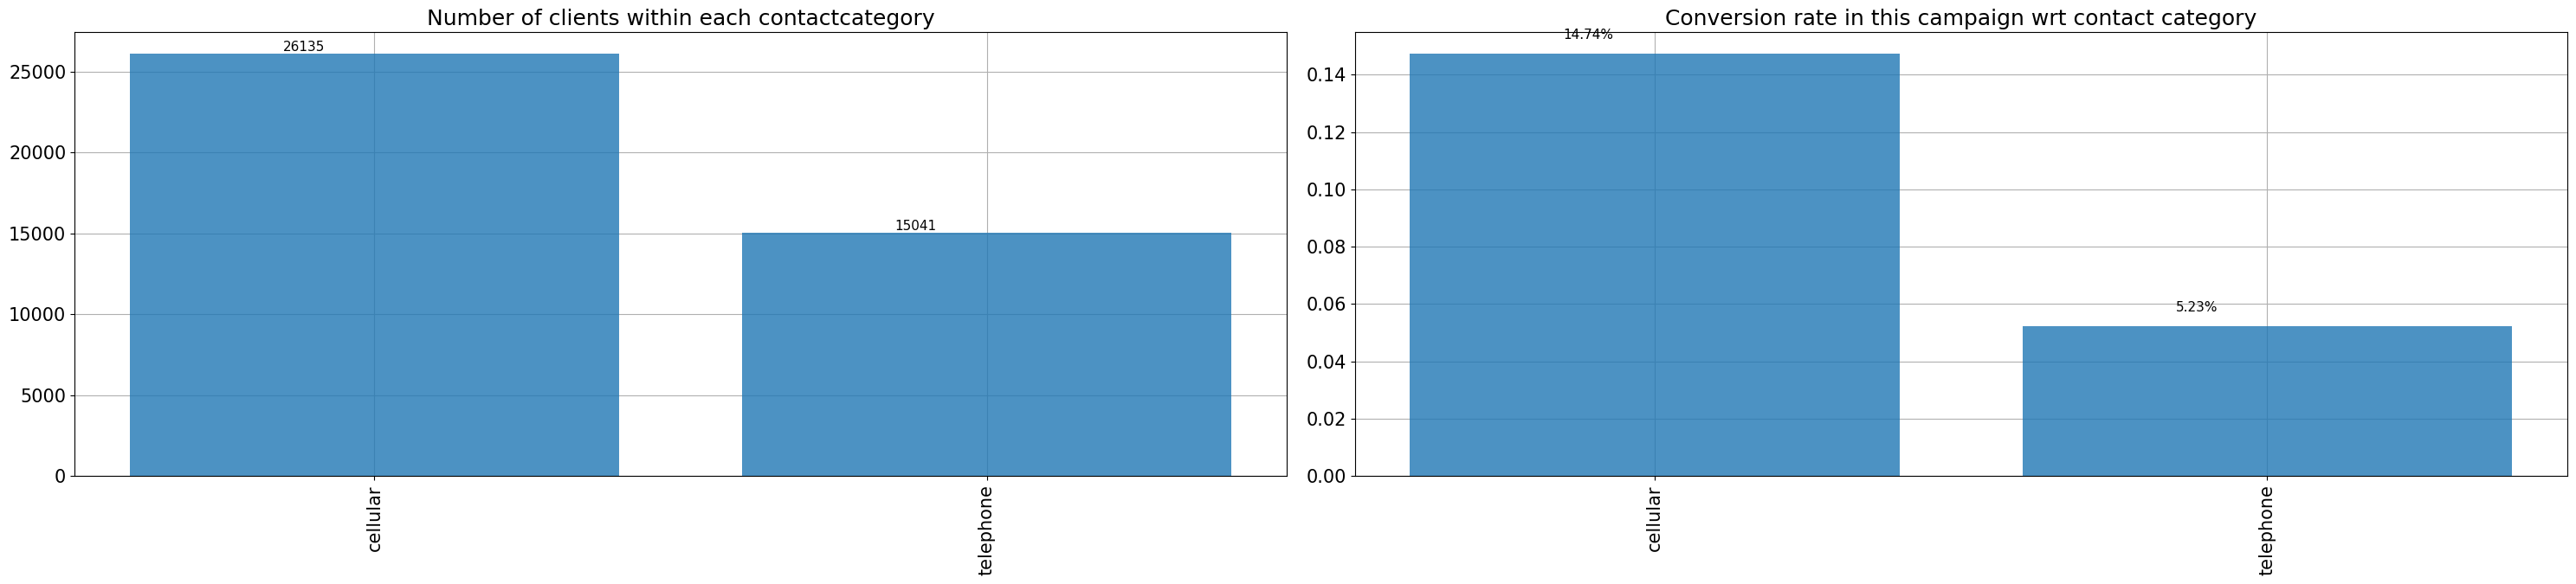

In [104]:
category_proportion_conversion_plot('contact')

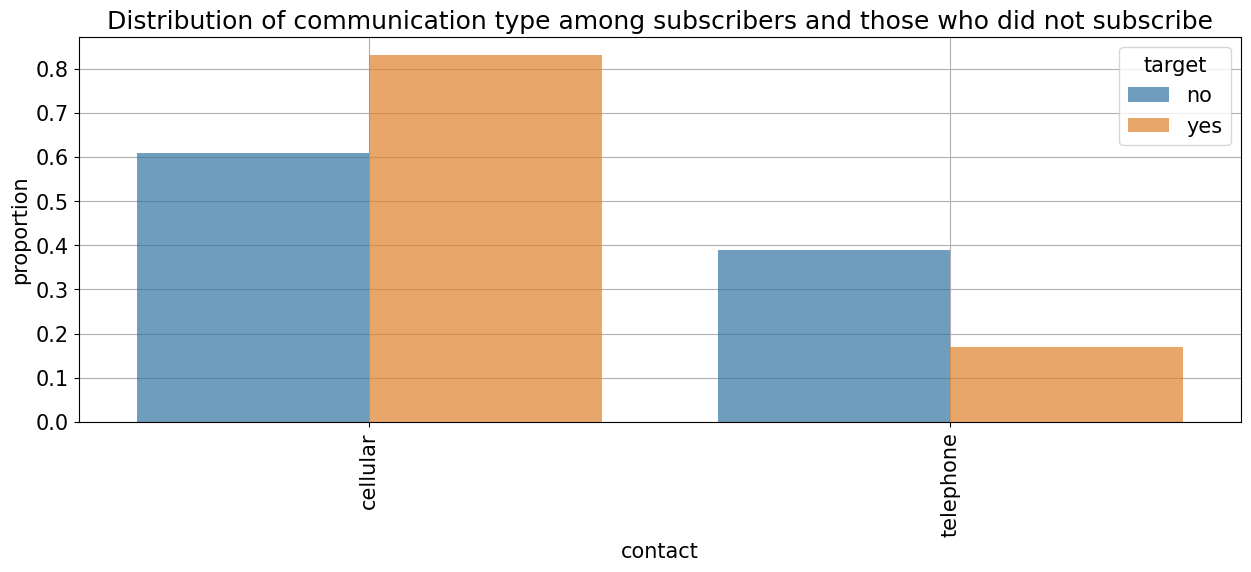

In [105]:
group_comparison('contact','Distribution of communication type among subscribers and those who did not subscribe')

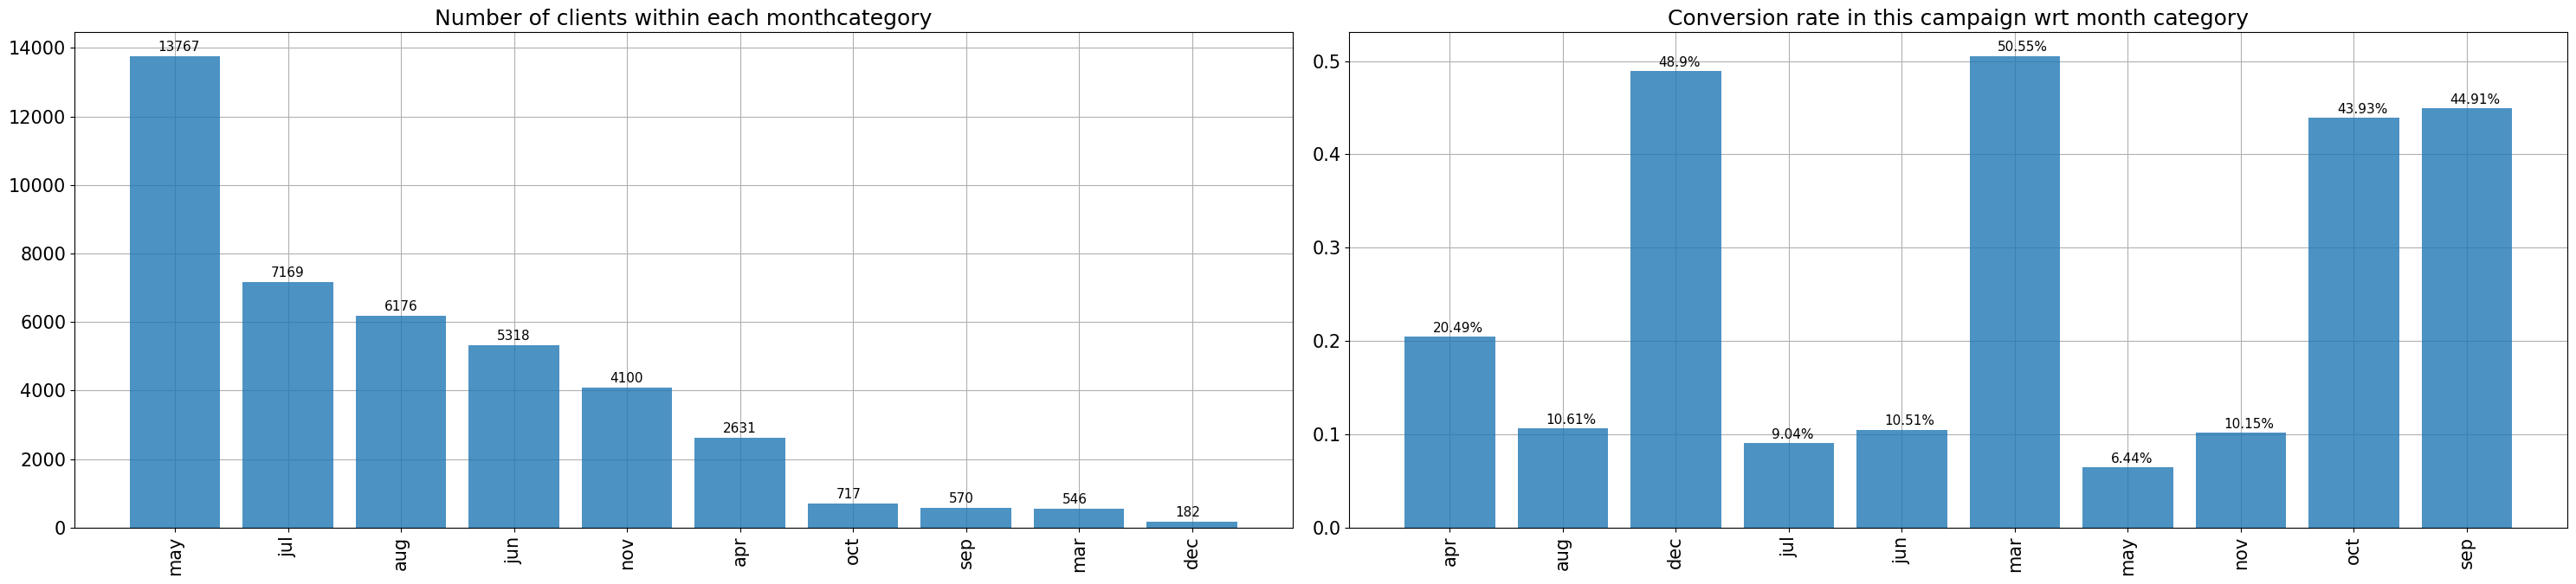

In [106]:
category_proportion_conversion_plot('month')

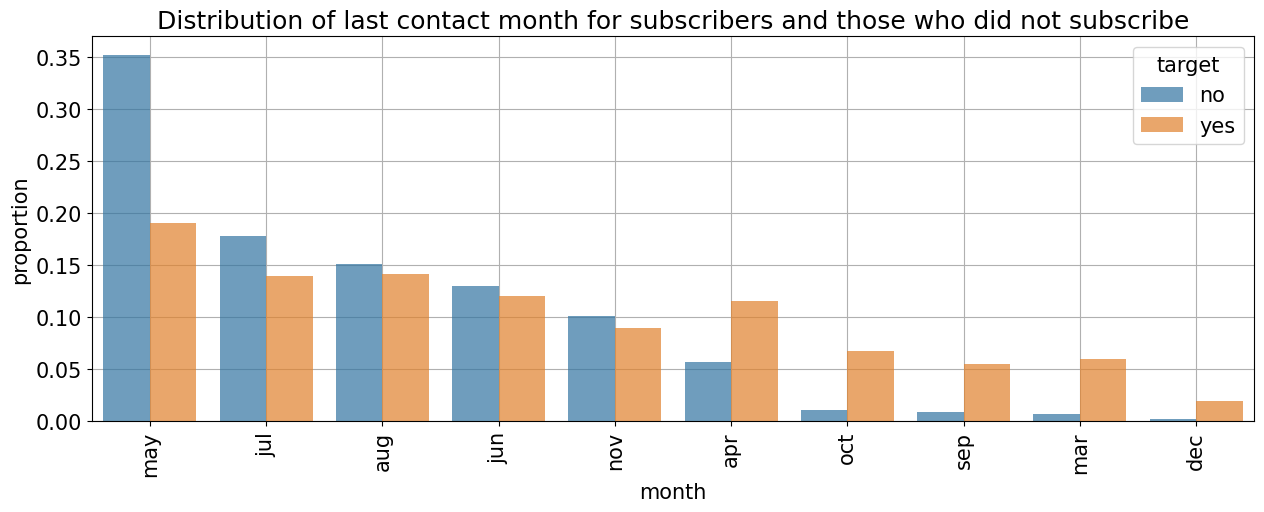

In [107]:
group_comparison('month', 'Distribution of last contact month for subscribers and those who did not subscribe')

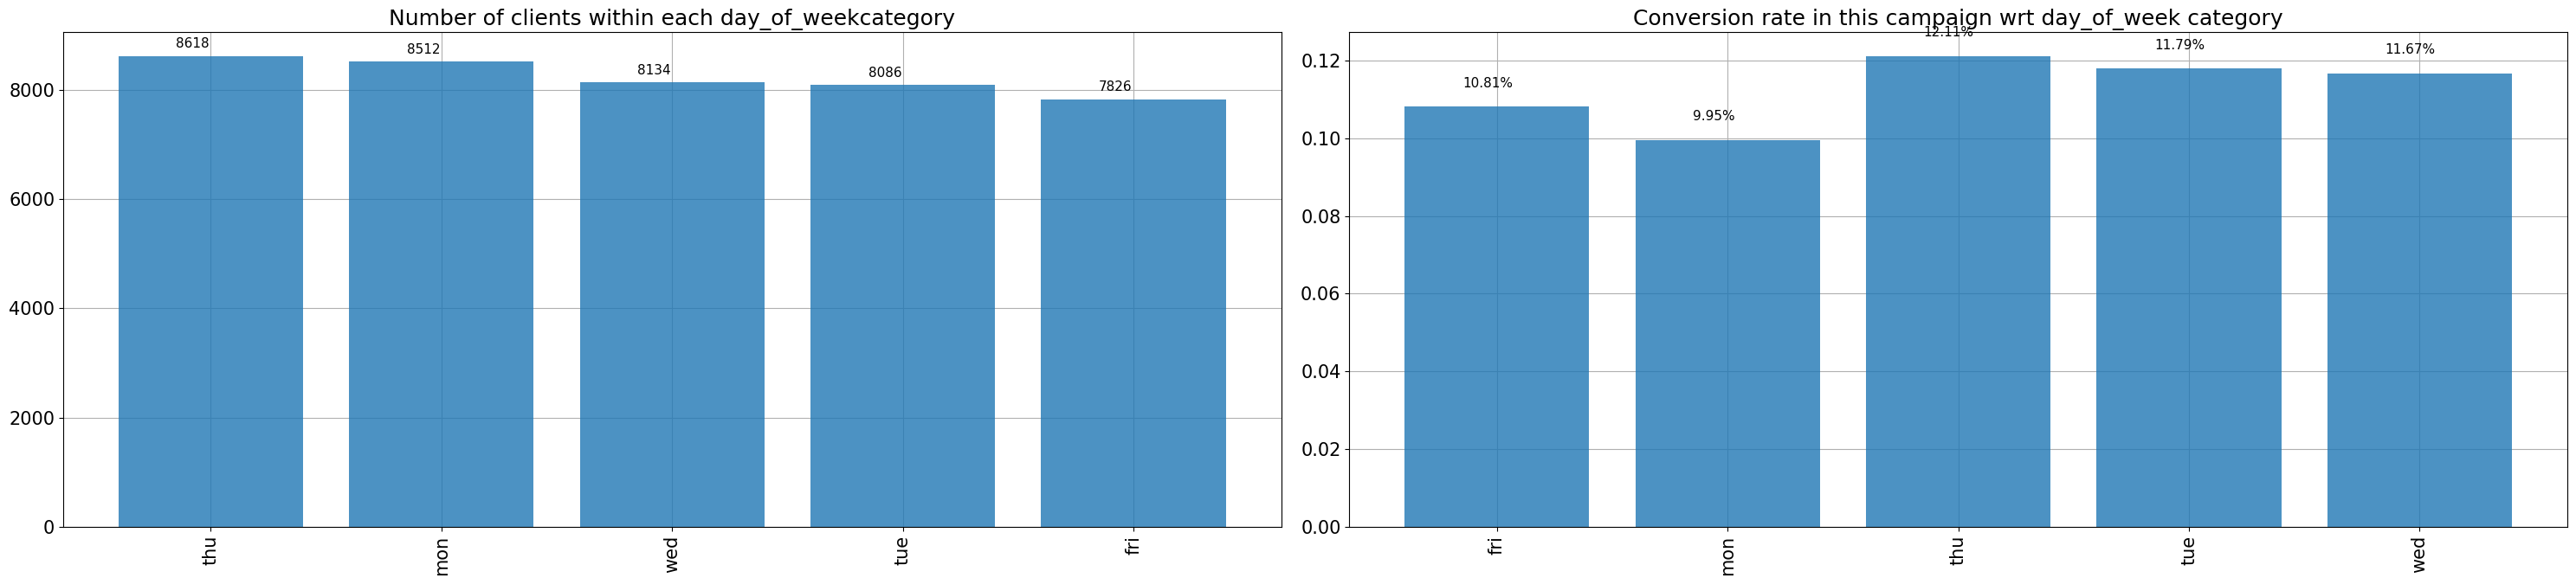

In [108]:
category_proportion_conversion_plot('day_of_week')

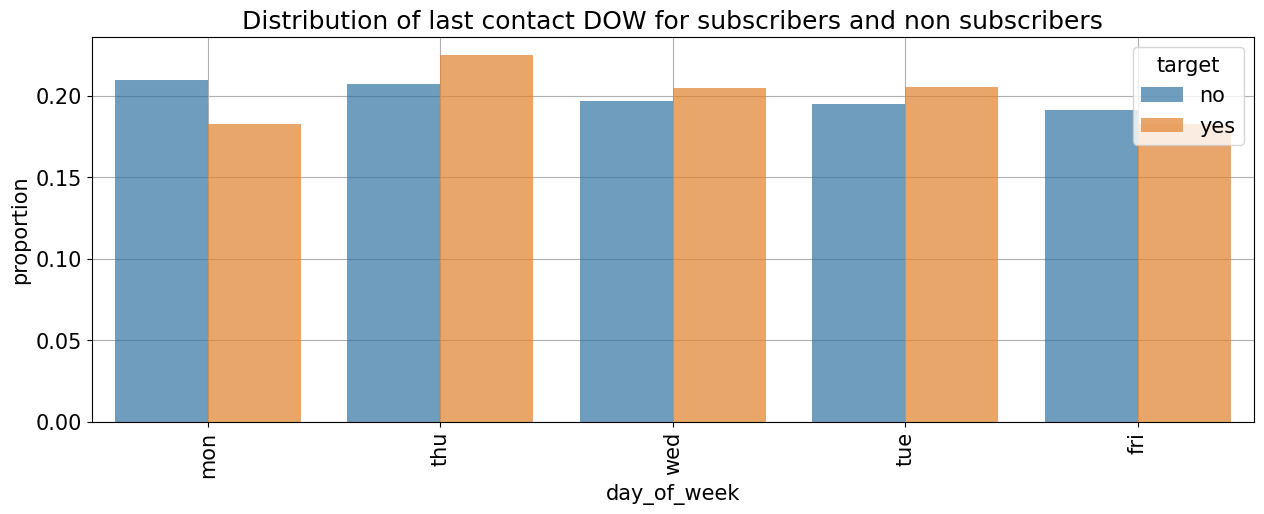

In [109]:
group_comparison('day_of_week','Distribution of last contact DOW for subscribers and non subscribers')

In [112]:
data['duration'].describe()

count    41176.000000
mean       258.315815
std        259.305321
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

<Axes: >

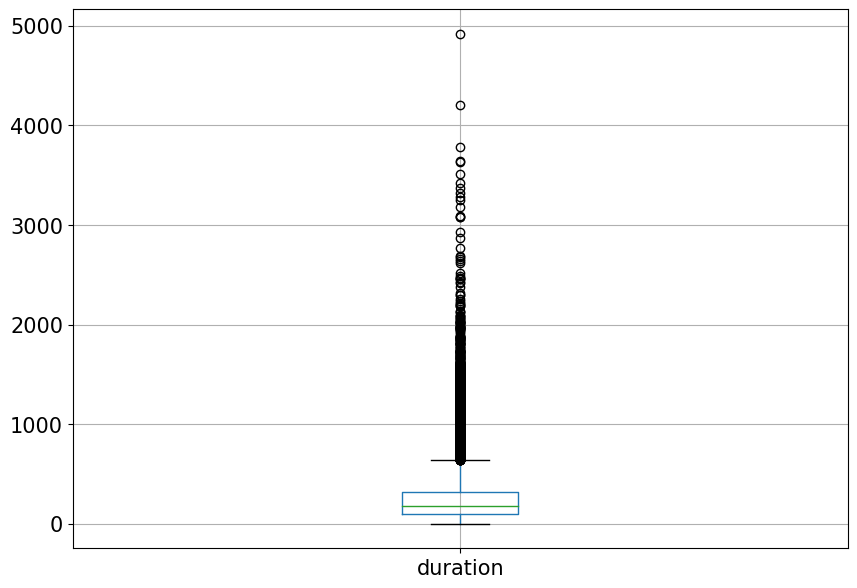

In [113]:
data.boxplot('duration')

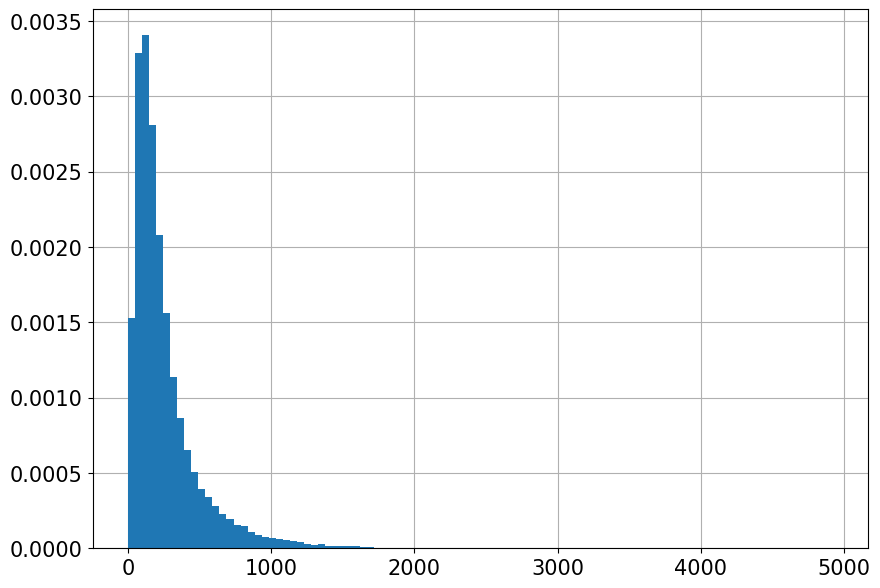

In [114]:
plt.hist(data.duration, density = True, bins = 100)
plt.grid()
plt.show()

In [115]:
data.campaign.describe()

count    41176.000000
mean         2.567879
std          2.770318
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

Text(0, 0.5, 'Number of contacts')

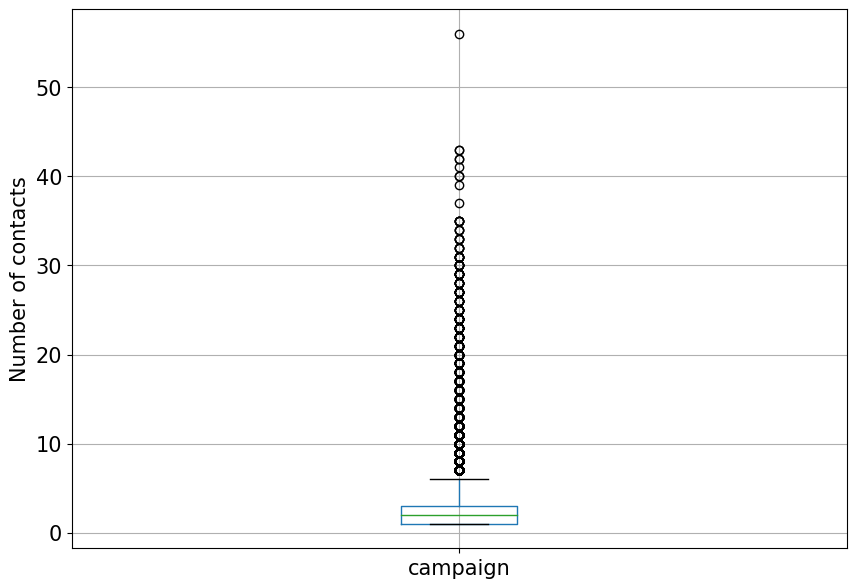

In [116]:
data.boxplot('campaign')
plt.ylabel('Number of contacts')

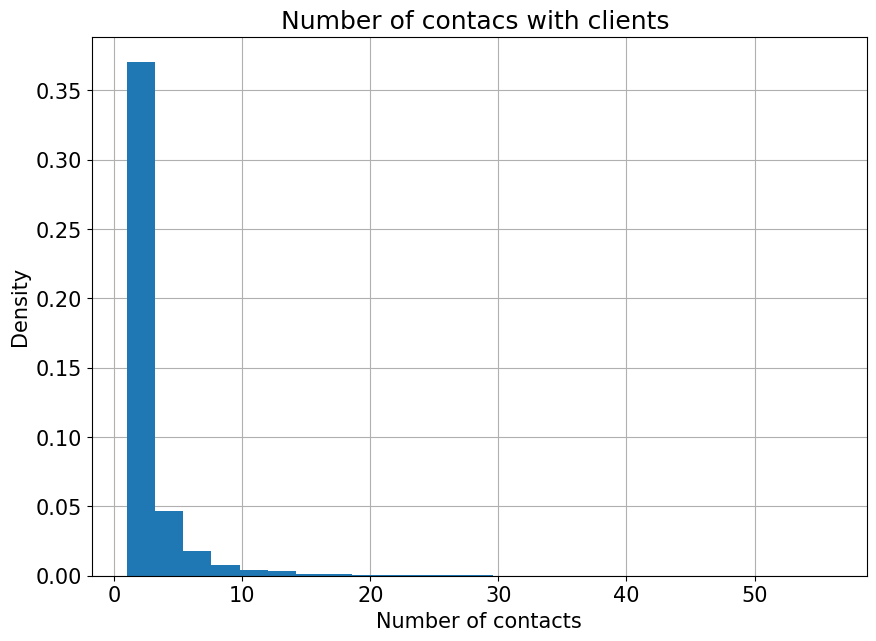

In [117]:
plt.hist(data.campaign, density = True, bins = 25)
plt.ylabel('Density')
plt.xlabel('Number of contacts')
plt.title('Number of contacs with clients ')
plt.grid()
plt.show()

In [118]:
data.campaign.value_counts(normalize = True)

campaign
1     0.428259
2     0.256654
3     0.129687
4     0.064358
5     0.038833
6     0.023776
7     0.015276
8     0.009714
9     0.006873
10    0.005464
11    0.004299
12    0.003036
13    0.002234
14    0.001676
17    0.001409
16    0.001239
15    0.001239
18    0.000801
20    0.000729
19    0.000631
21    0.000583
22    0.000413
23    0.000389
24    0.000364
27    0.000267
29    0.000243
28    0.000194
26    0.000194
25    0.000194
31    0.000170
30    0.000170
35    0.000121
32    0.000097
33    0.000097
34    0.000073
42    0.000049
40    0.000049
43    0.000049
56    0.000024
39    0.000024
41    0.000024
37    0.000024
Name: proportion, dtype: float64

In [119]:
data.campaign.value_counts(normalize = True)[3:].sum()

0.185399261705848

In [120]:
data[data.campaign>=4].target.value_counts(normalize = True)

target
no     0.927299
yes    0.072701
Name: proportion, dtype: float64

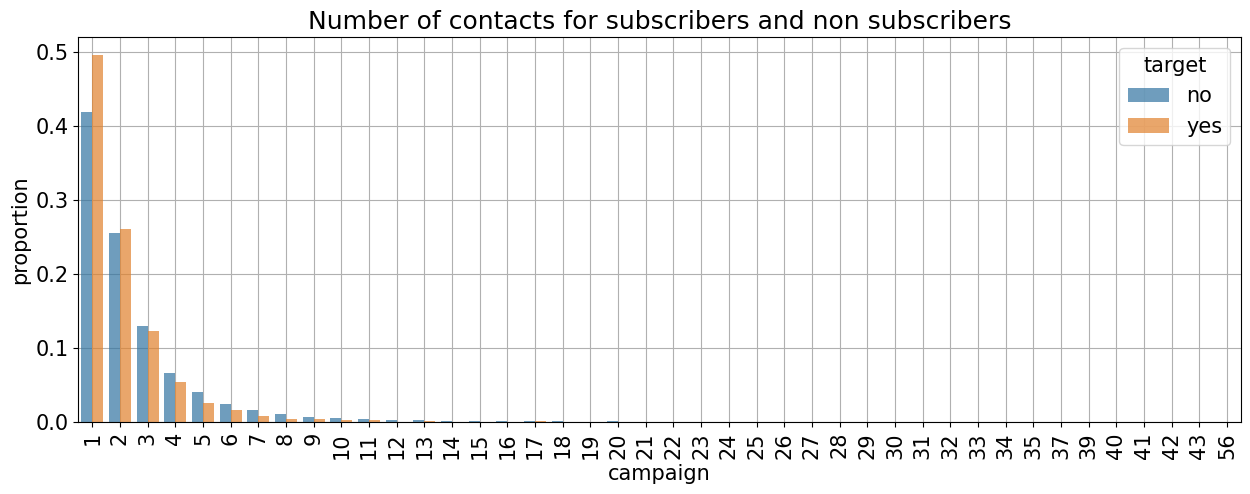

In [121]:
group_comparison('campaign','Number of contacts for subscribers and non subscribers')

In [122]:
data[data.target == 'yes'].campaign.value_counts(normalize = True)

campaign
1     0.495581
2     0.261048
3     0.123734
4     0.053675
5     0.025868
6     0.016167
7     0.008191
8     0.003665
9     0.003665
10    0.002587
11    0.002587
17    0.000862
13    0.000862
12    0.000647
15    0.000431
23    0.000216
14    0.000216
Name: proportion, dtype: float64

In [123]:
data[data.target == 'yes'].campaign.value_counts(normalize = True)[:3].sum()

0.8803621470144428

In [124]:
data.pdays.unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20])

In [125]:
data.pdays.value_counts(normalize = True)

pdays
999    0.963207
3      0.010662
6      0.010006
4      0.002866
9      0.001554
2      0.001481
7      0.001457
12     0.001409
10     0.001263
5      0.001117
13     0.000874
11     0.000680
1      0.000631
15     0.000583
14     0.000486
8      0.000437
0      0.000364
16     0.000267
17     0.000194
18     0.000170
22     0.000073
19     0.000073
21     0.000049
25     0.000024
26     0.000024
27     0.000024
20     0.000024
Name: proportion, dtype: float64

In [126]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'target'],
      dtype='object')

In [127]:
data.previous.value_counts(normalize = True)

previous
0    0.863391
1    0.110768
2    0.018312
3    0.005246
4    0.001700
5    0.000437
6    0.000121
7    0.000024
Name: proportion, dtype: float64

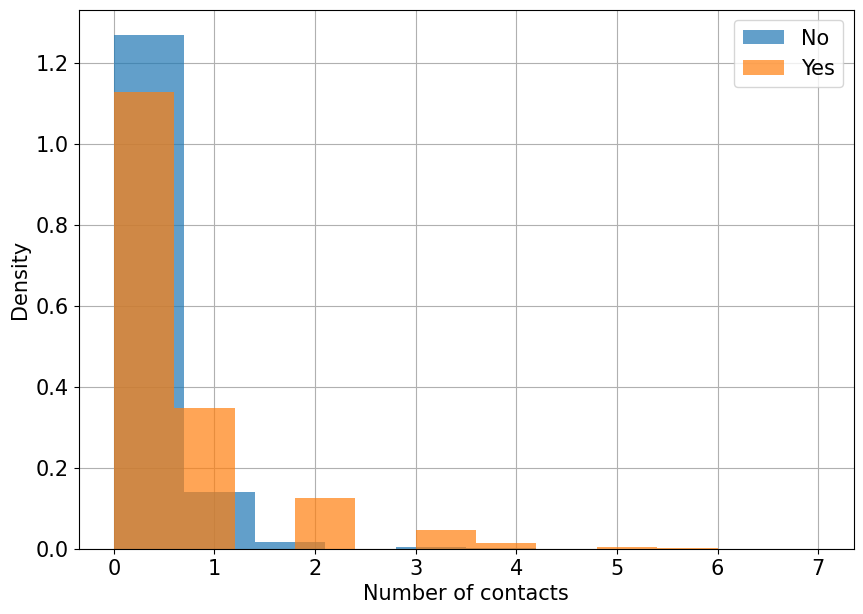

In [128]:
plt.hist(data[data.target == 'no'].previous,  density = True, alpha = 0.7, label = 'No')
plt.hist(data[data.target == 'yes'].previous,  density = True, alpha = 0.7, label = 'Yes')
plt.xlabel('Number of contacts')
plt.ylabel('Density')
plt.grid()
plt.legend()
plt.show()

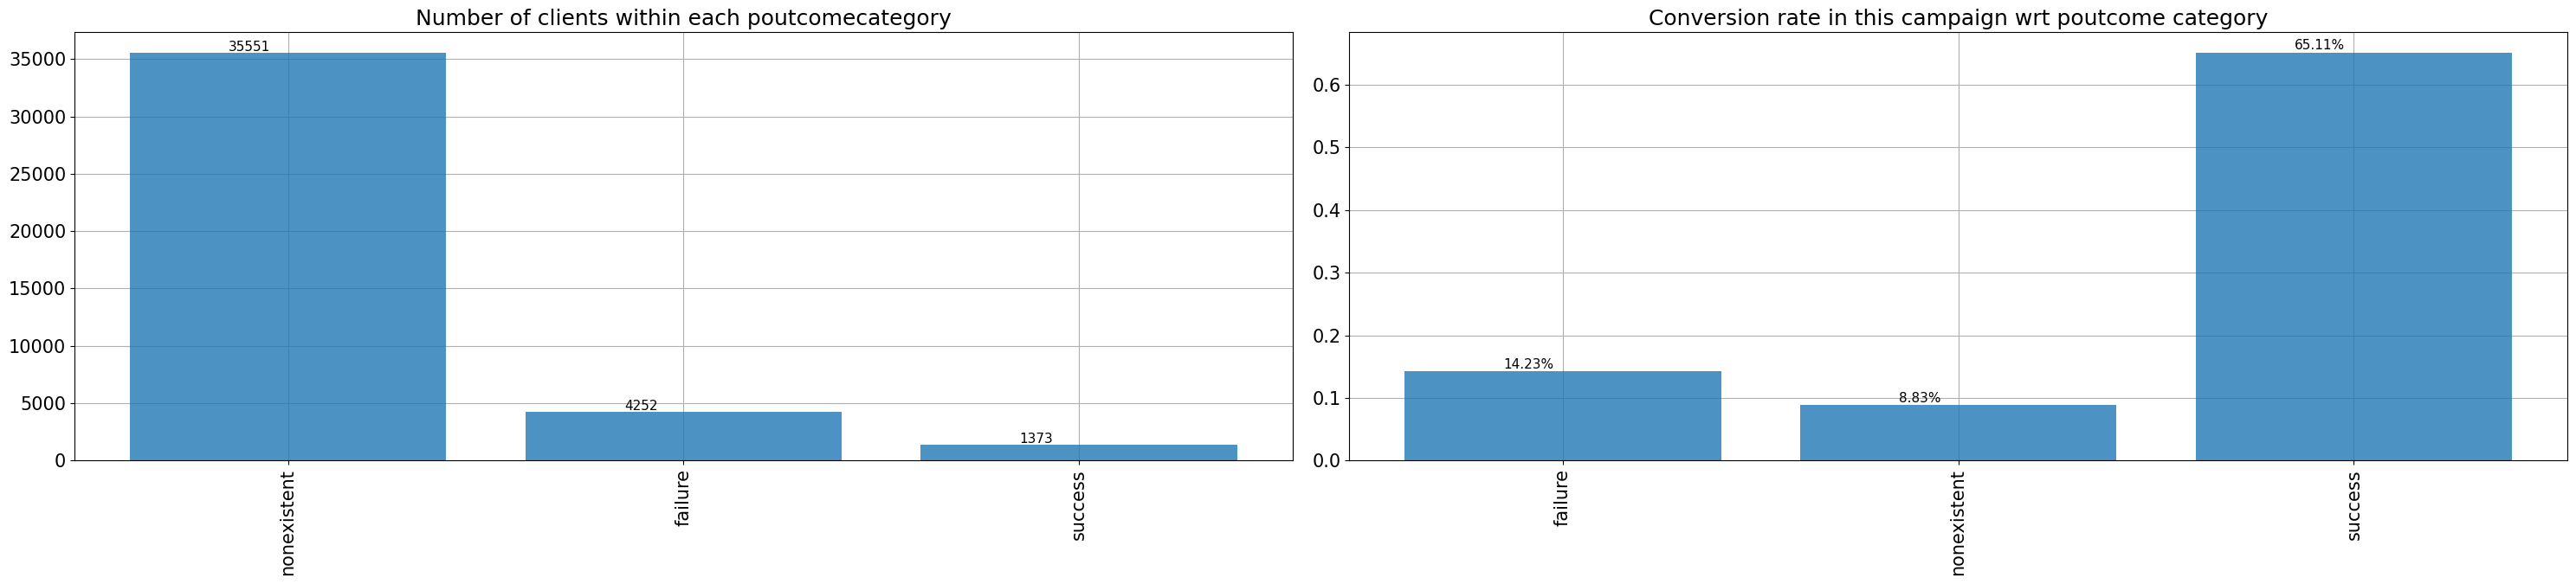

In [129]:
category_proportion_conversion_plot('poutcome')

In [130]:
data[data.previous == 0].poutcome.unique()

array(['nonexistent'], dtype=object)

In [131]:
data[data.previous != 0].poutcome.unique()

array(['failure', 'success'], dtype=object)

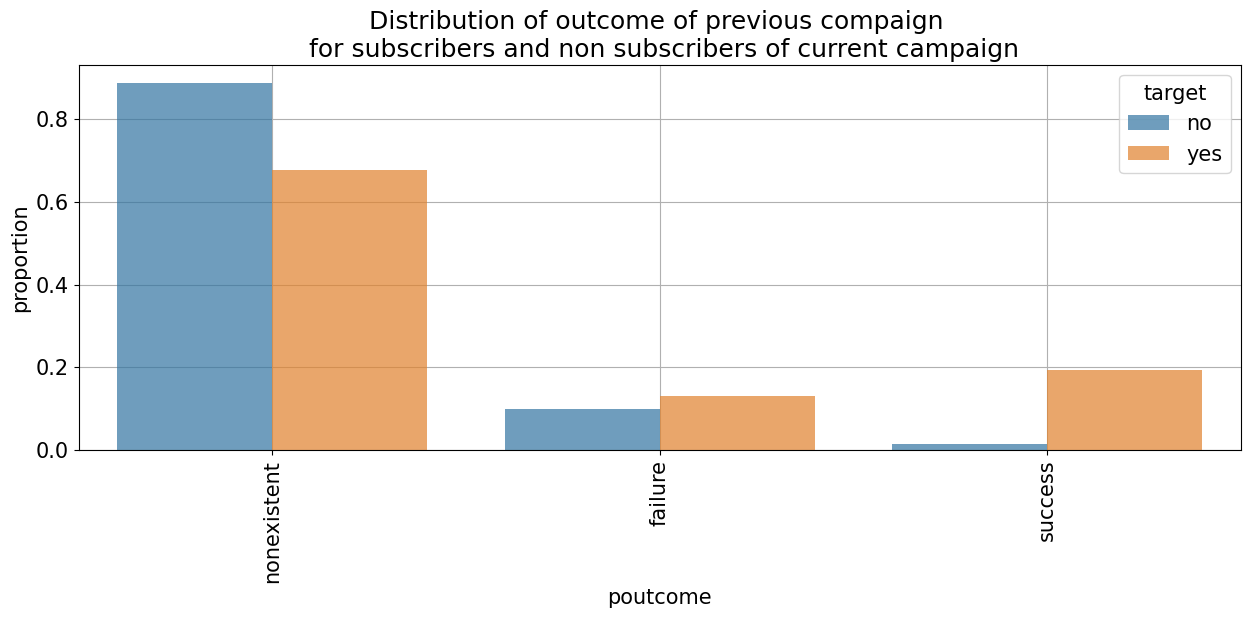

In [132]:
group_comparison('poutcome', 'Distribution of outcome of previous compaign \n for subscribers and non subscribers of current campaign' )

In [133]:
data['emp.var.rate'].value_counts()

emp.var.rate
 1.4    16228
-1.8     9182
 1.1     7762
-0.1     3682
-2.9     1662
-3.4     1070
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: count, dtype: int64

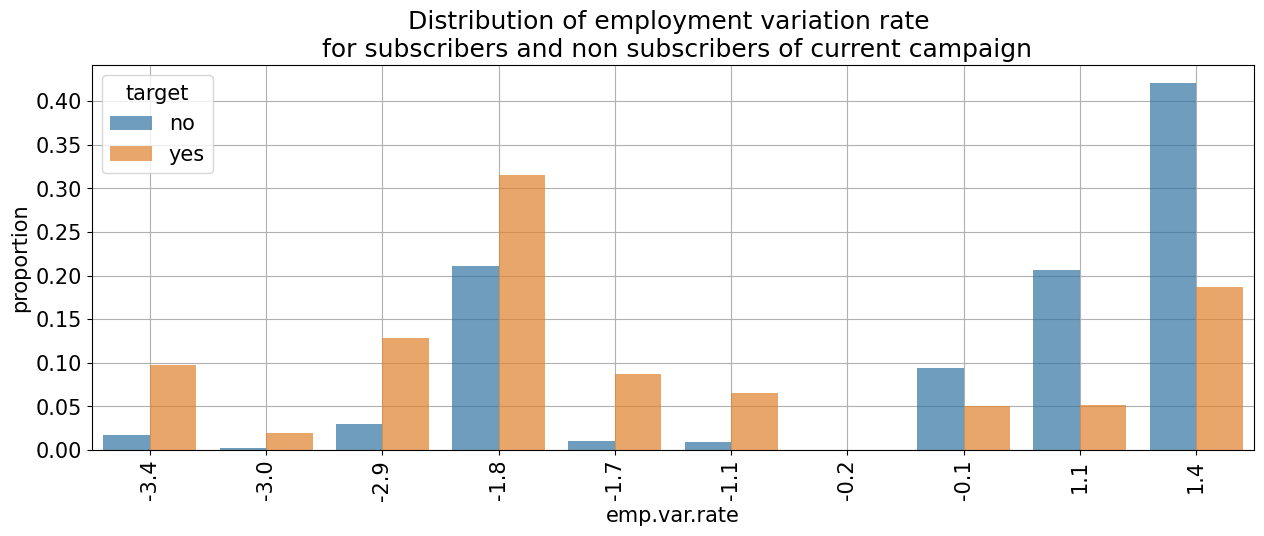

In [134]:
group_comparison('emp.var.rate','Distribution of employment variation rate \n for subscribers and non subscribers of current campaign')

In [135]:
data['cons.price.idx'].value_counts()

cons.price.idx
93.994    7762
93.918    6681
92.893    5793
93.444    5173
94.465    4374
93.200    3615
93.075    2457
92.201     770
92.963     715
92.431     446
92.649     357
94.215     311
94.199     303
92.843     282
92.379     267
93.369     264
94.027     233
94.055     229
93.876     212
94.601     204
92.469     177
93.749     174
92.713     172
94.767     128
93.798      67
92.756      10
Name: count, dtype: int64

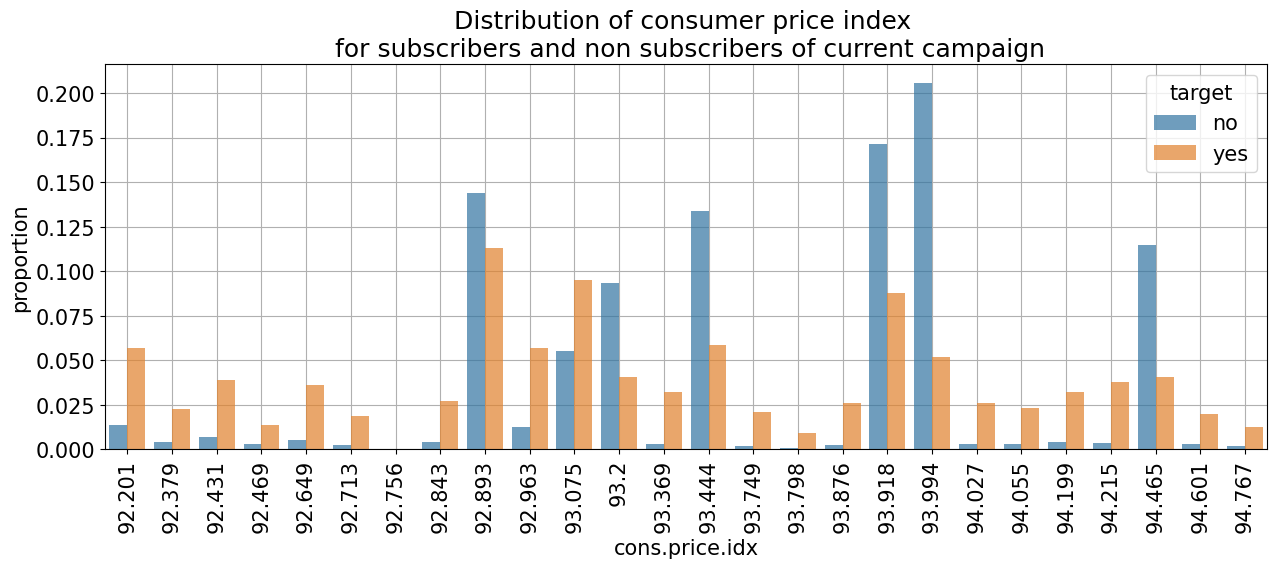

In [136]:
group_comparison('cons.price.idx','Distribution of consumer price index \n for subscribers and non subscribers of current campaign' )

In [137]:
data['cons.conf.idx'].value_counts()

cons.conf.idx
-36.4    7762
-42.7    6681
-46.2    5793
-36.1    5173
-41.8    4374
-42.0    3615
-47.1    2457
-31.4     770
-40.8     715
-26.9     446
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     177
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: count, dtype: int64

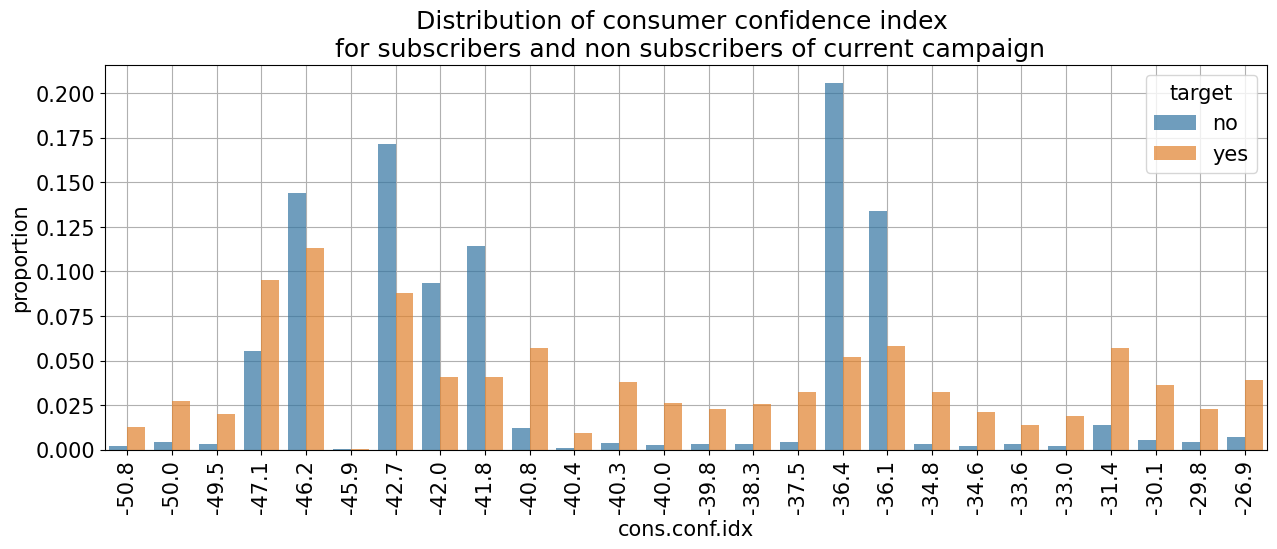

In [138]:
group_comparison('cons.conf.idx','Distribution of consumer confidence index \n for subscribers and non subscribers of current campaign')

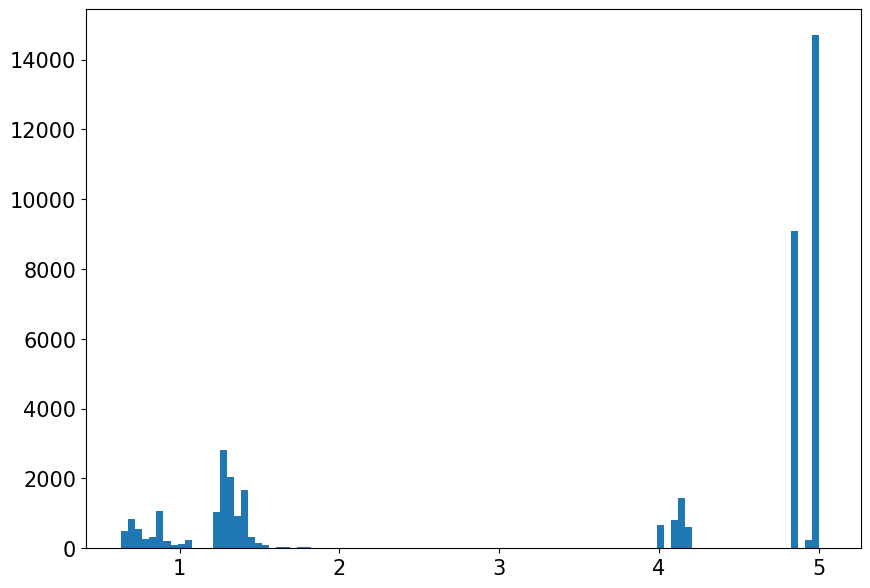

In [139]:
plt.hist(data['euribor3m'],100)
plt.show()

In [140]:
len(data['euribor3m'].unique())

316

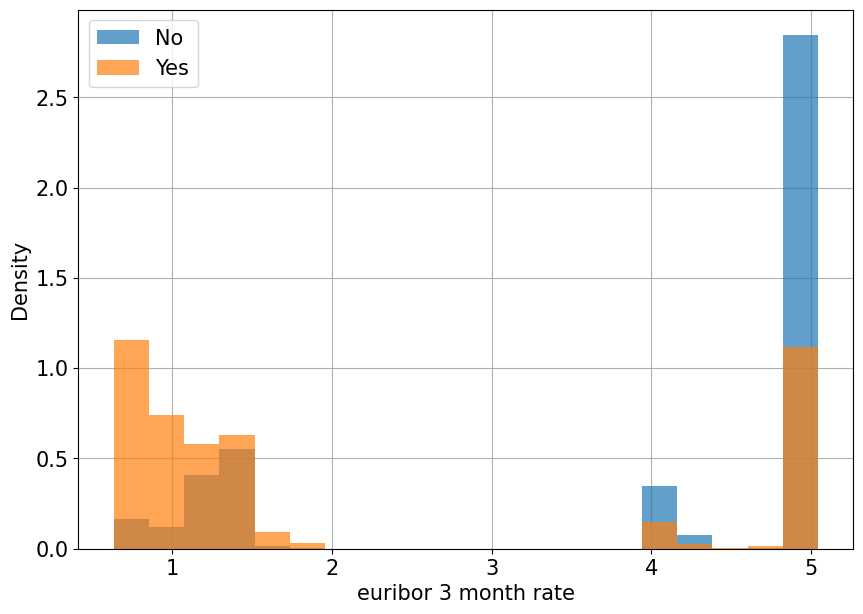

In [141]:
plt.hist(data[data.target == 'no'].euribor3m,bins = 20, density = True, alpha = 0.7, label = 'No')
plt.hist(data[data.target == 'yes'].euribor3m,bins = 20, density = True, alpha = 0.7, label = 'Yes')
plt.ylabel('Density')
plt.xlabel('euribor 3 month rate')
plt.grid()
plt.legend()
plt.show()

In [142]:
data['nr.employed'].value_counts()

nr.employed
5228.1    16228
5099.1     8532
5191.0     7762
5195.8     3682
5076.2     1662
5017.5     1070
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: count, dtype: int64

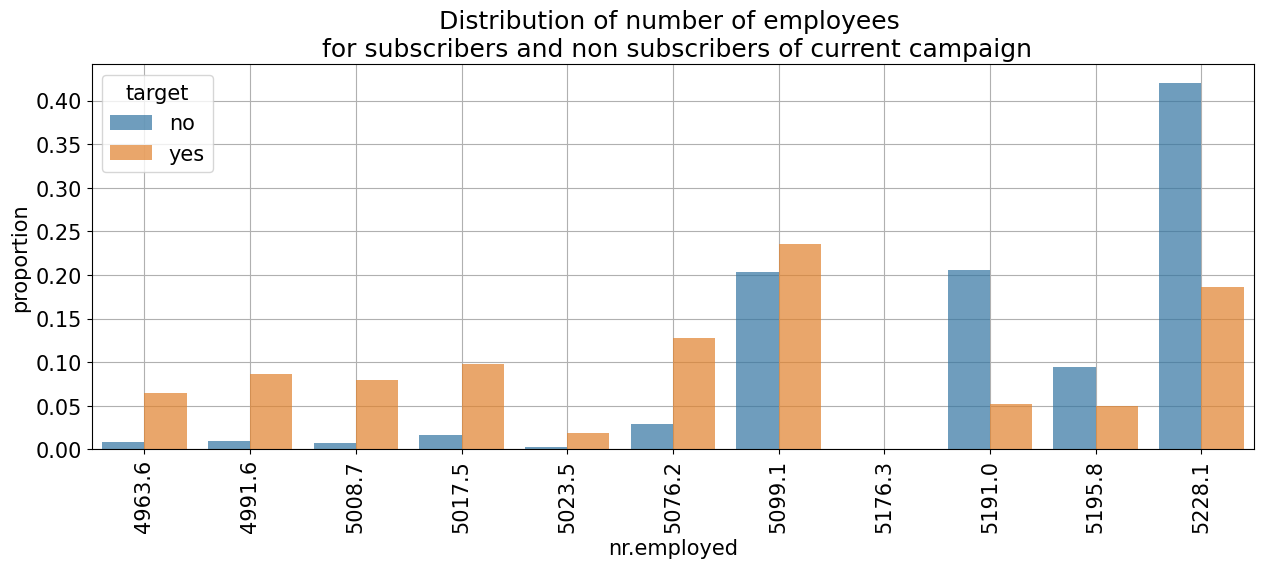

In [143]:
group_comparison('nr.employed','Distribution of number of employees \n for subscribers and non subscribers of current campaign' )

In [169]:
corr = data[num].corr()

In [170]:
corr

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000808,0.004622,-0.034381,0.024379,-0.000242,0.001009,0.129075,0.010852,-0.017607
duration,-0.000808,1.000000,-0.071765,-0.047556,0.020600,-0.027941,0.005303,-0.008126,-0.032861,-0.044672
campaign,0.004622,-0.071765,1.000000,0.052606,-0.079182,0.150786,0.127826,-0.013657,0.135169,0.144129
pdays,-0.034381,-0.047556,0.052606,1.000000,-0.587508,0.271063,0.078920,-0.091374,0.296946,0.372659
previous,0.024379,0.020600,-0.079182,-0.587508,1.000000,-0.420587,-0.203197,-0.050929,-0.454571,-0.501411
emp.var.rate,-0.000242,-0.027941,0.150786,0.271063,-0.420587,1.000000,0.775293,0.196257,0.972244,0.906949
cons.price.idx,0.001009,0.005303,0.127826,0.078920,-0.203197,0.775293,1.000000,0.059170,0.688180,0.521945
cons.conf.idx,0.129075,-0.008126,-0.013657,-0.091374,-0.050929,0.196257,0.059170,1.000000,0.277864,0.100679
euribor3m,0.010852,-0.032861,0.135169,0.296946,-0.454571,0.972244,0.688180,0.277864,1.000000,0.945146
nr.employed,-0.017607,-0.044672,0.144129,0.372659,-0.501411,0.906949,0.521945,0.100679,0.945146,1.000000


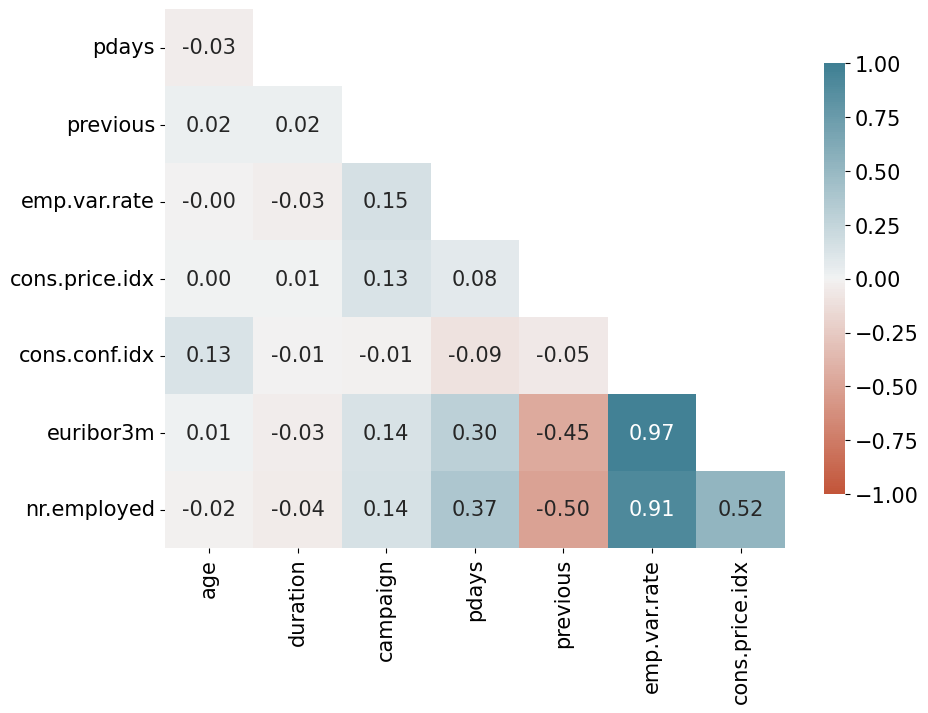

In [182]:
mask = np.triu(np.ones_like(corr, dtype=np.bool_))
mask = mask[1:,:-1]
corr = corr.iloc[1:,:-1].copy()
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap=sns.diverging_palette(20, 220, n=200),
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})
plt.yticks(rotation=0)
plt.show()